# Multiple Regression Project


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
data = pd.read_csv('CO2_Emissions_Canada.csv')

In [ ]:
data.head(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [ ]:
data.nunique()

Make                                  42
Model                               2053
Vehicle Class                         16
Engine Size(L)                        51
Cylinders                              8
Transmission                          27
Fuel Type                              5
Fuel Consumption City (L/100 km)     211
Fuel Consumption Hwy (L/100 km)      143
Fuel Consumption Comb (L/100 km)     181
Fuel Consumption Comb (mpg)           54
CO2 Emissions(g/km)                  331
dtype: int64

In [ ]:
data['Vehicle Class'].unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT',
       'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

In [ ]:
data['Cylinders'].unique()

array([ 4,  6, 12,  8, 10,  3,  5, 16])

In [ ]:
data['Fuel Type'].unique()

array(['Z', 'D', 'X', 'E', 'N'], dtype=object)

## Preprocessing

In [ ]:
# Checking for duplicates

data.duplicated().sum()

1103

In [ ]:
# Drop duplicates

data.drop_duplicates(inplace = True)

In [ ]:
# Missing values

data.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

## Exploratory Data Analysis

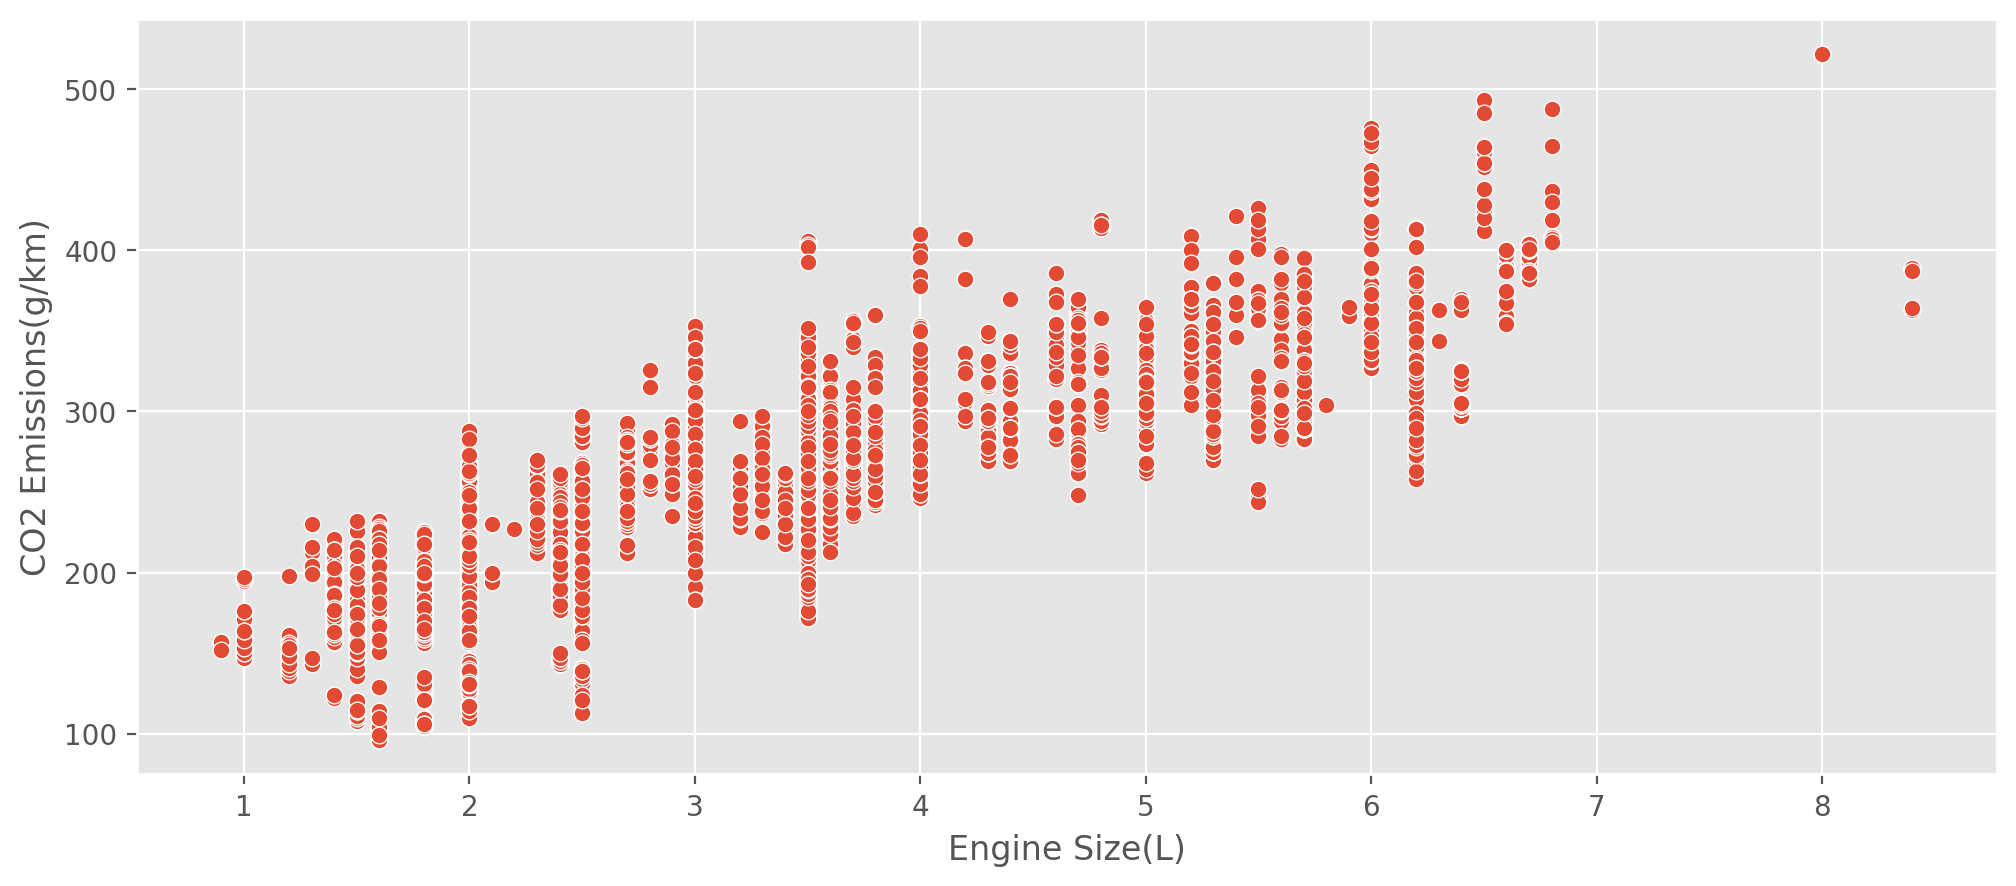

In [ ]:
plt.figure(figsize = (12,5), dpi = 200 )
sns.scatterplot('Engine Size(L)', 'CO2 Emissions(g/km)', data = data)

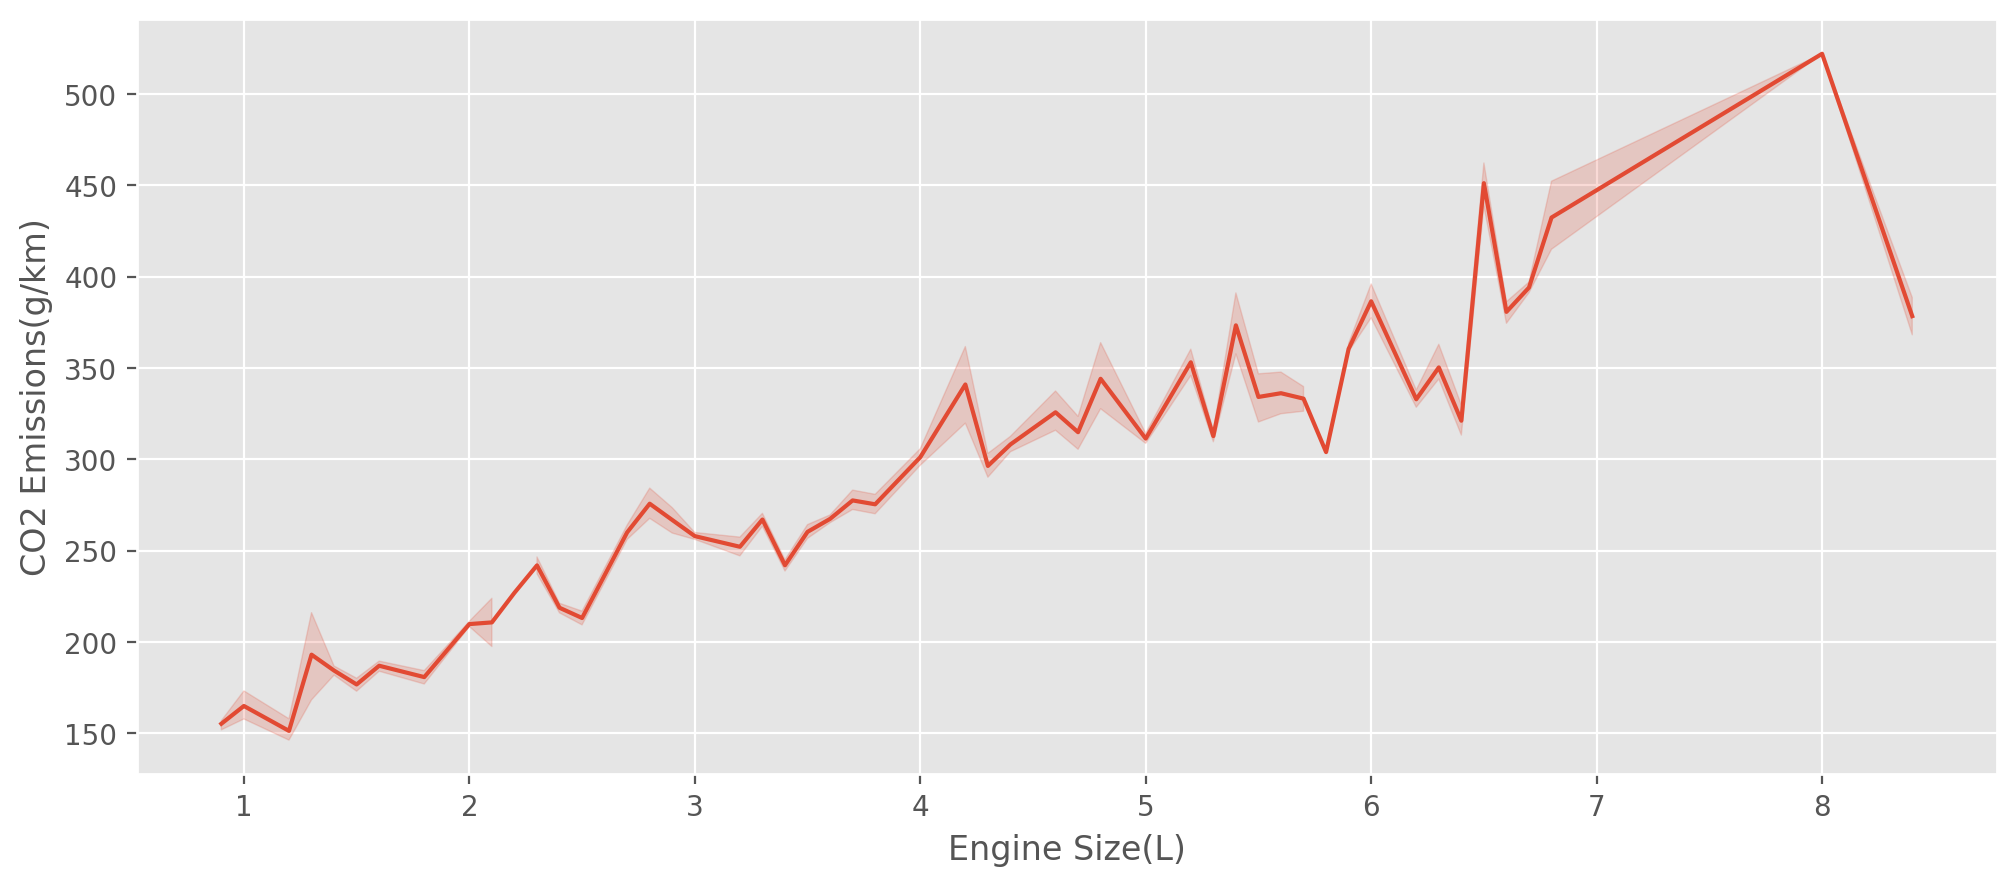

In [ ]:
plt.figure(figsize = (12,5), dpi = 200 )
sns.lineplot('Engine Size(L)', 'CO2 Emissions(g/km)', data = data)

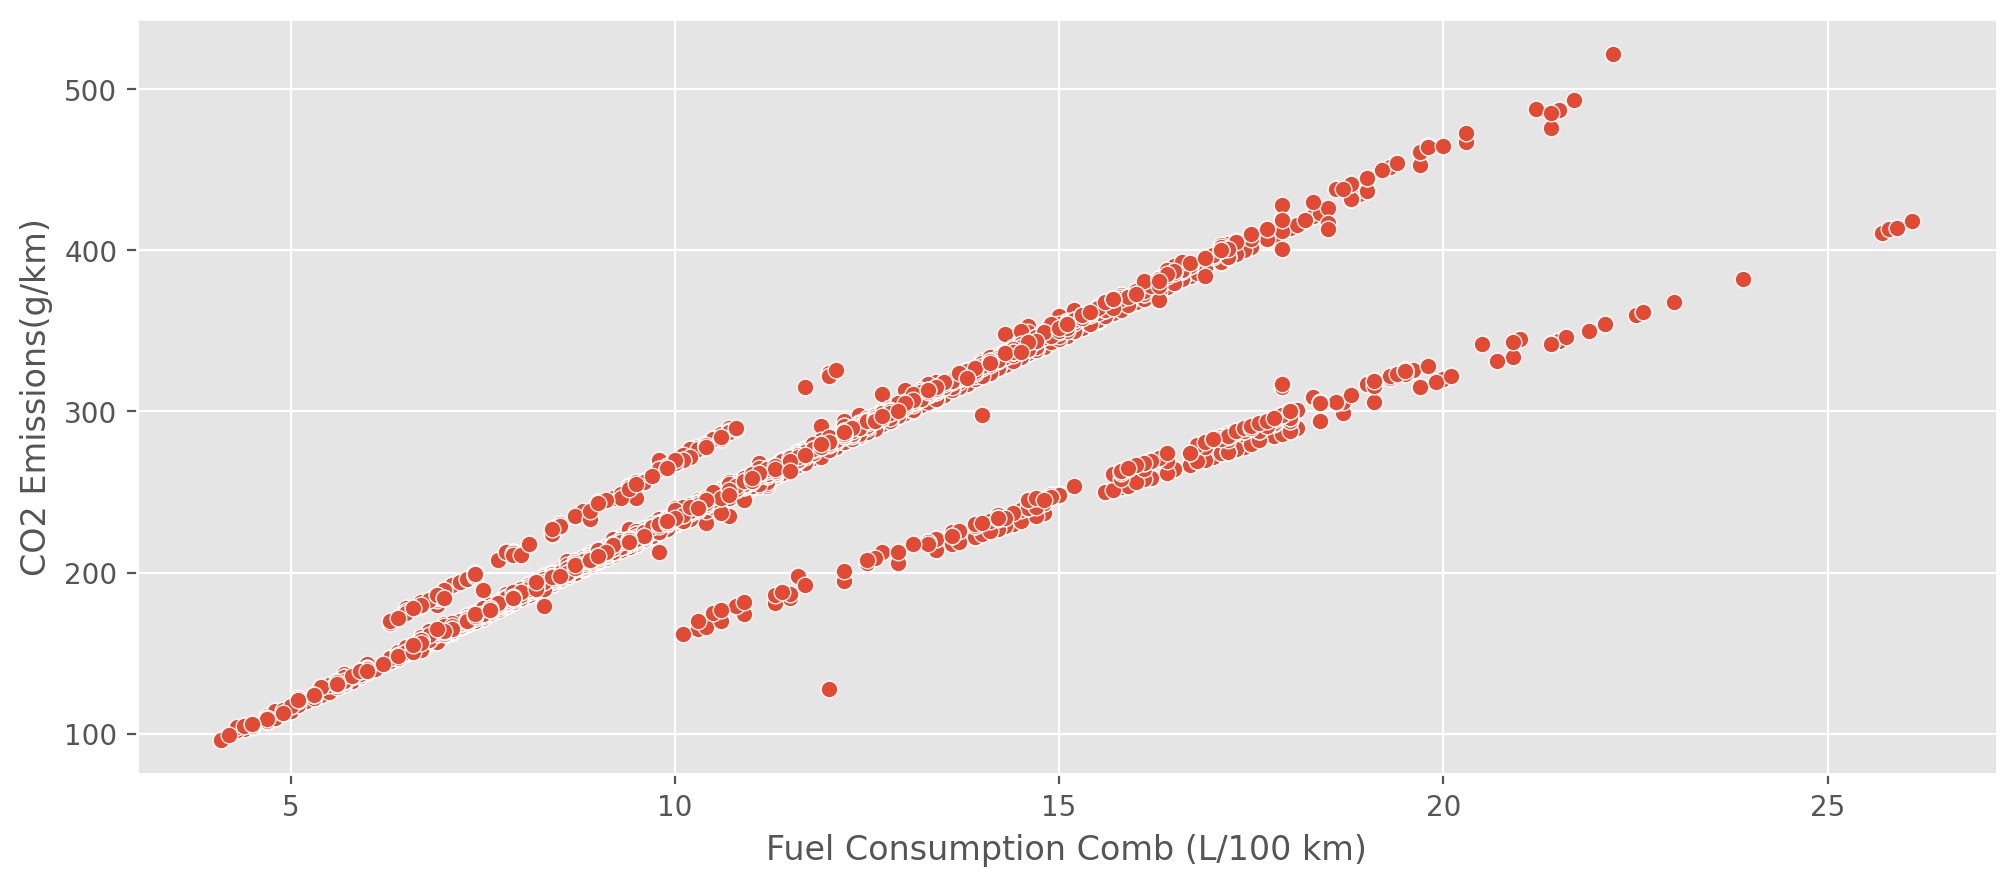

In [ ]:
plt.figure(figsize = (12,5), dpi = 200 )
sns.scatterplot('Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)', data = data)

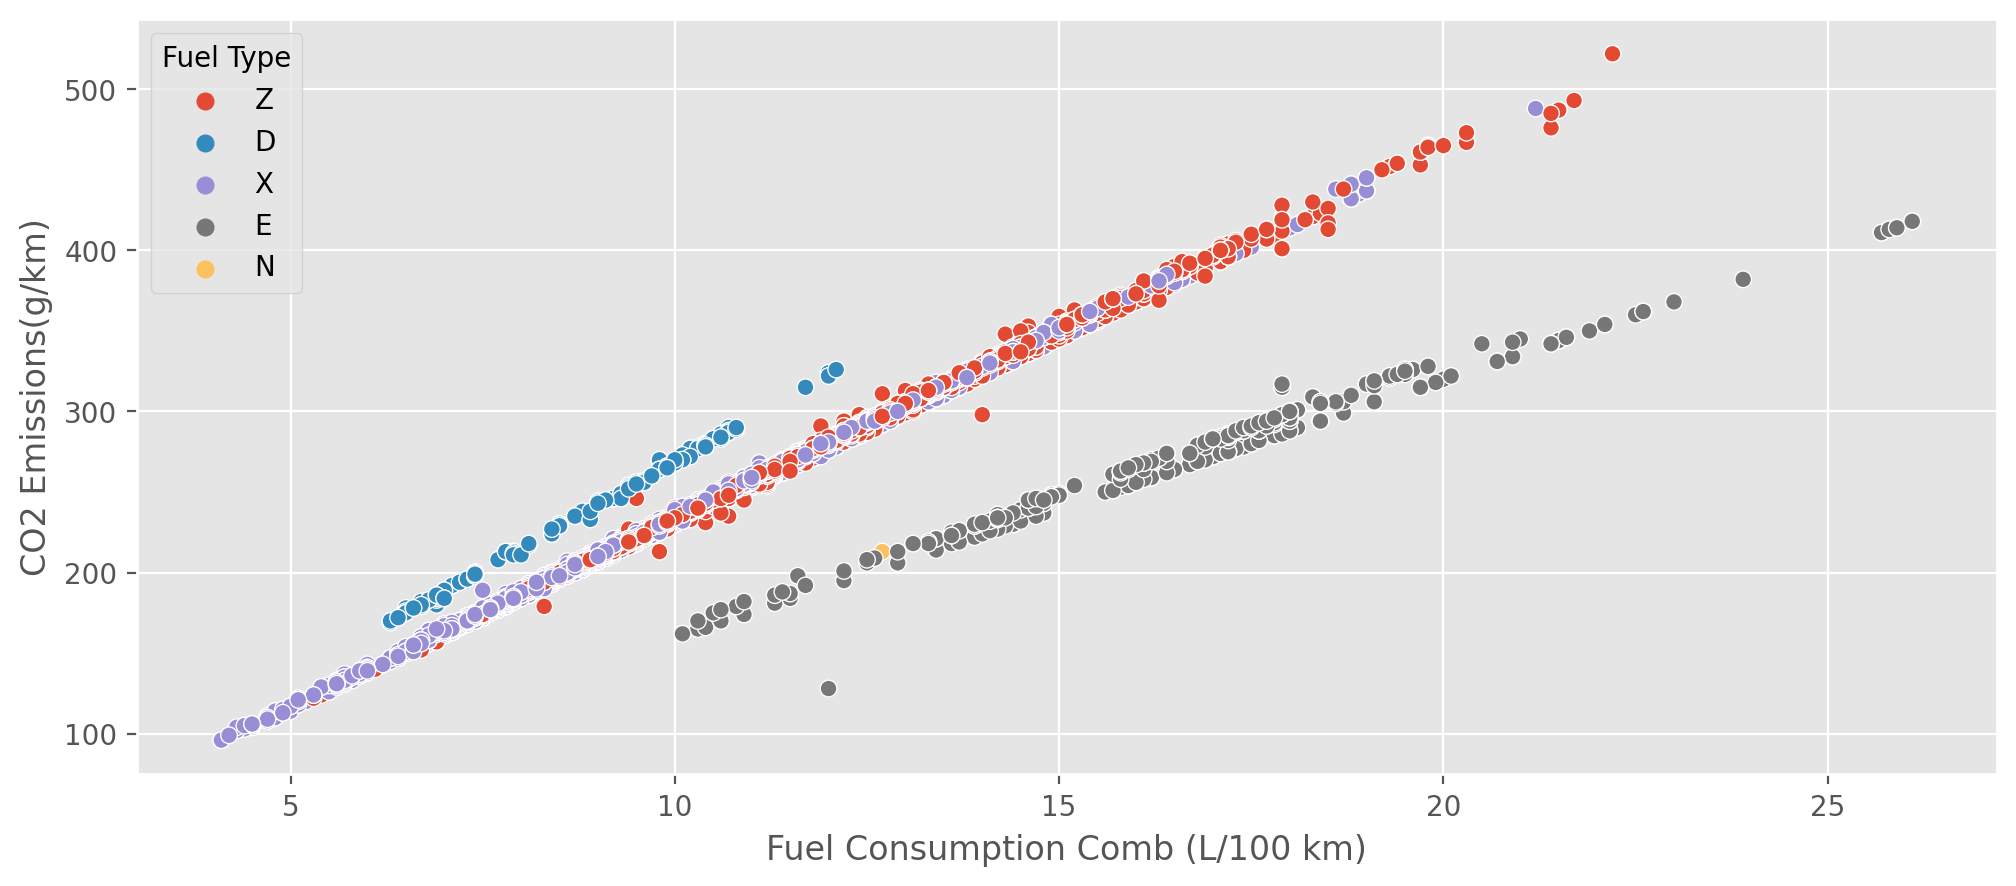

In [ ]:
plt.figure(figsize = (12,5), dpi = 200 )
sns.scatterplot('Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)', hue = 'Fuel Type', data = data)

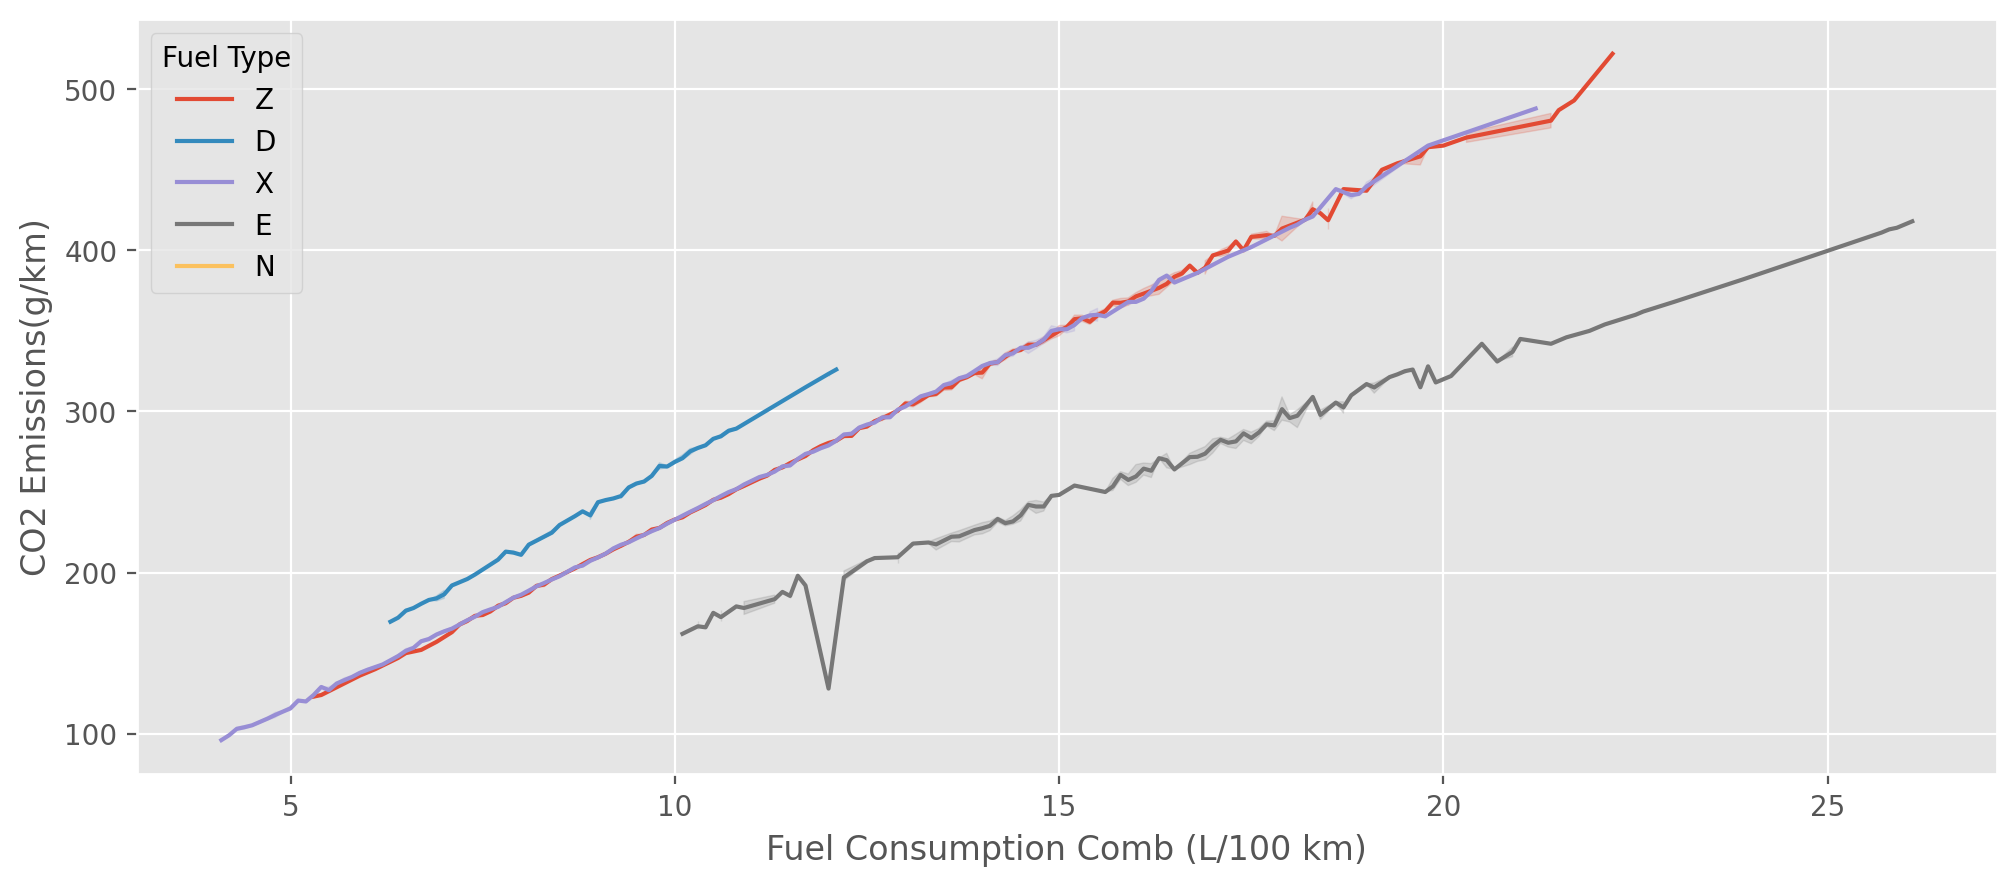

In [ ]:
plt.figure(figsize = (12,5), dpi = 200 )
sns.lineplot('Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)', hue = 'Fuel Type', data = data)

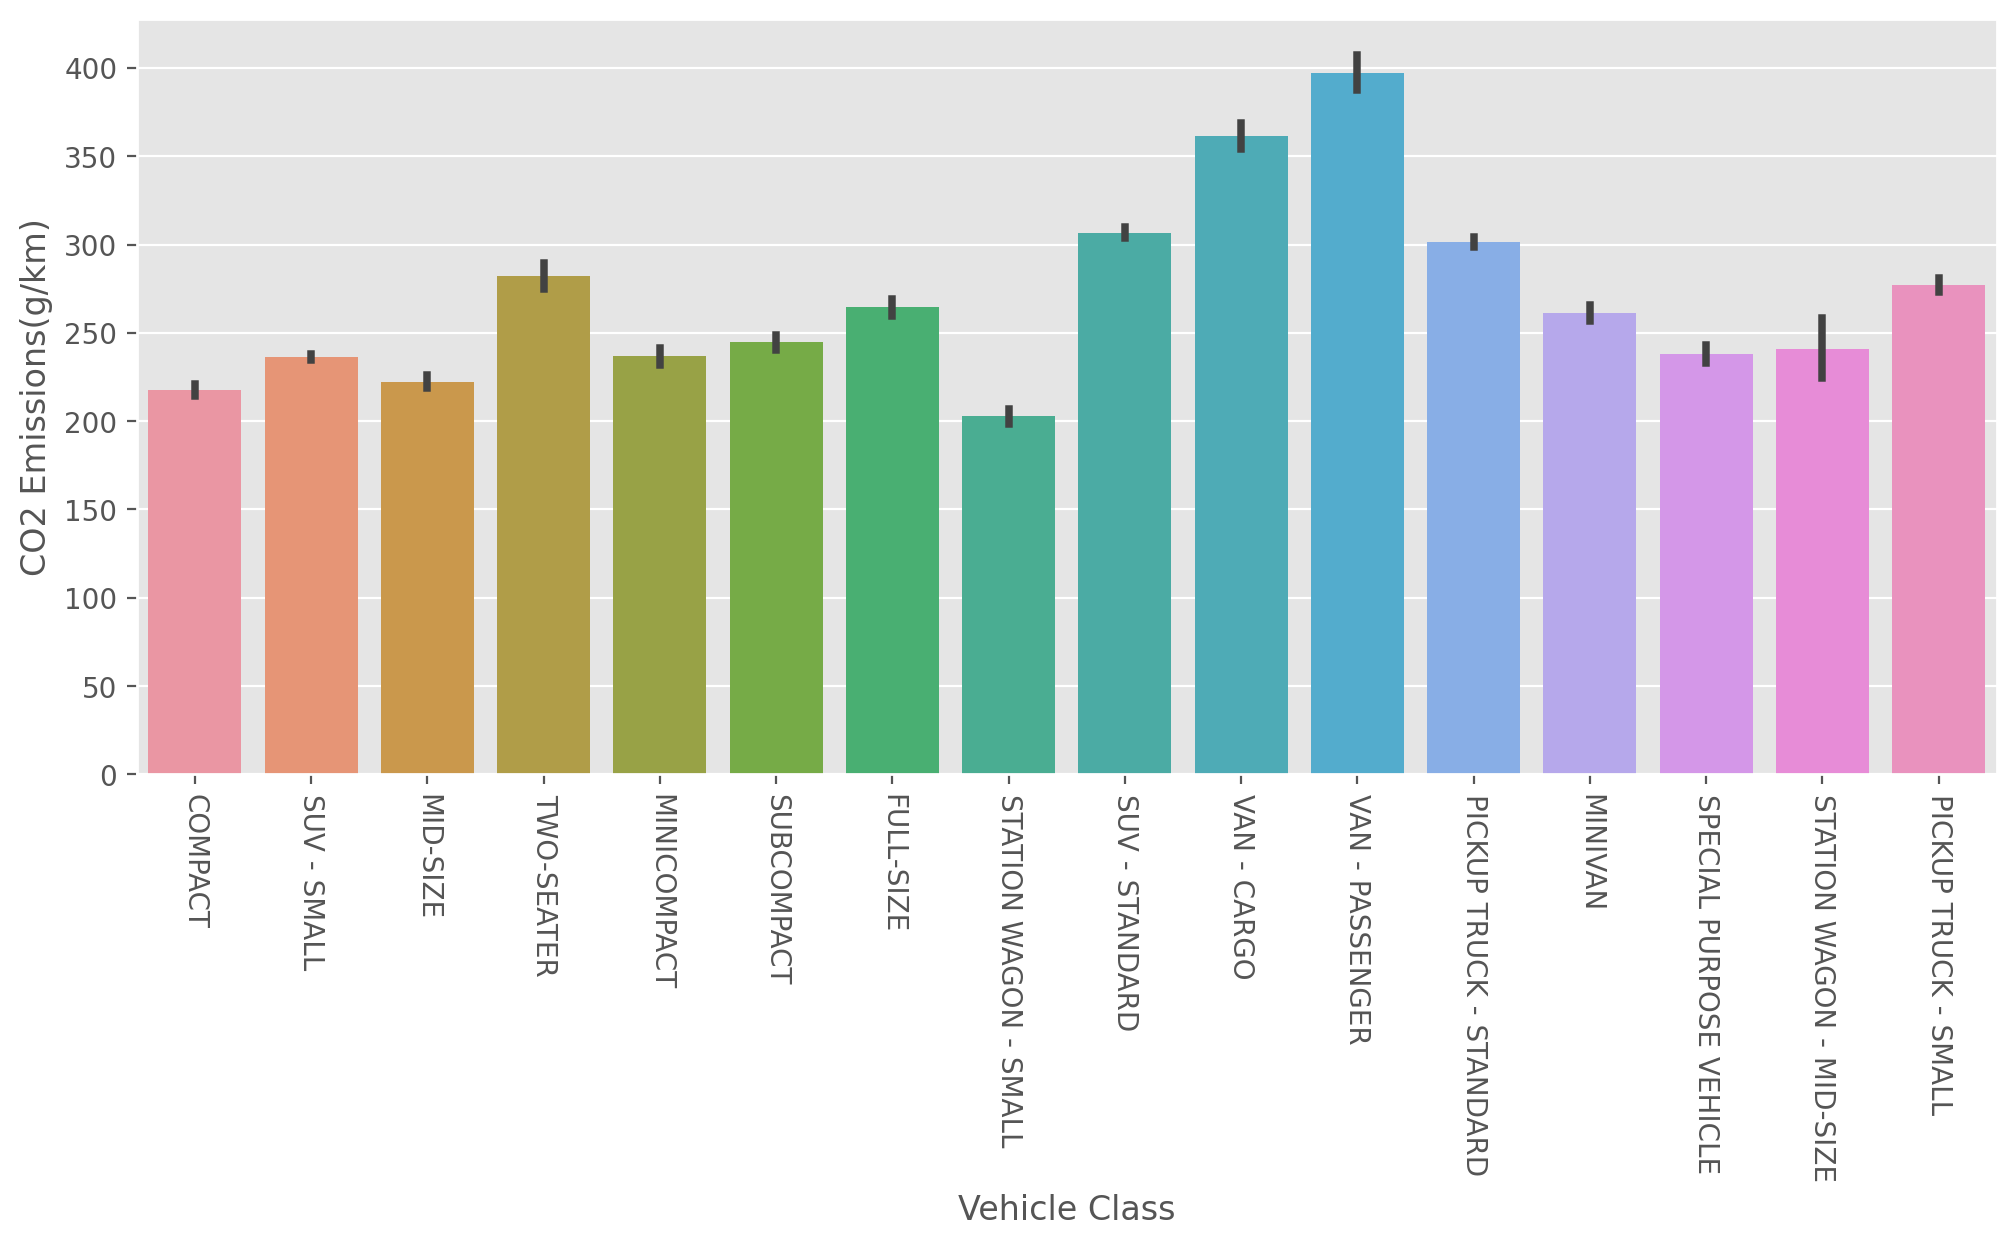

In [ ]:
plt.figure(figsize = (12,5), dpi = 200 )
plt.xticks(rotation = 270)
sns.barplot('Vehicle Class', 'CO2 Emissions(g/km)', data = data)

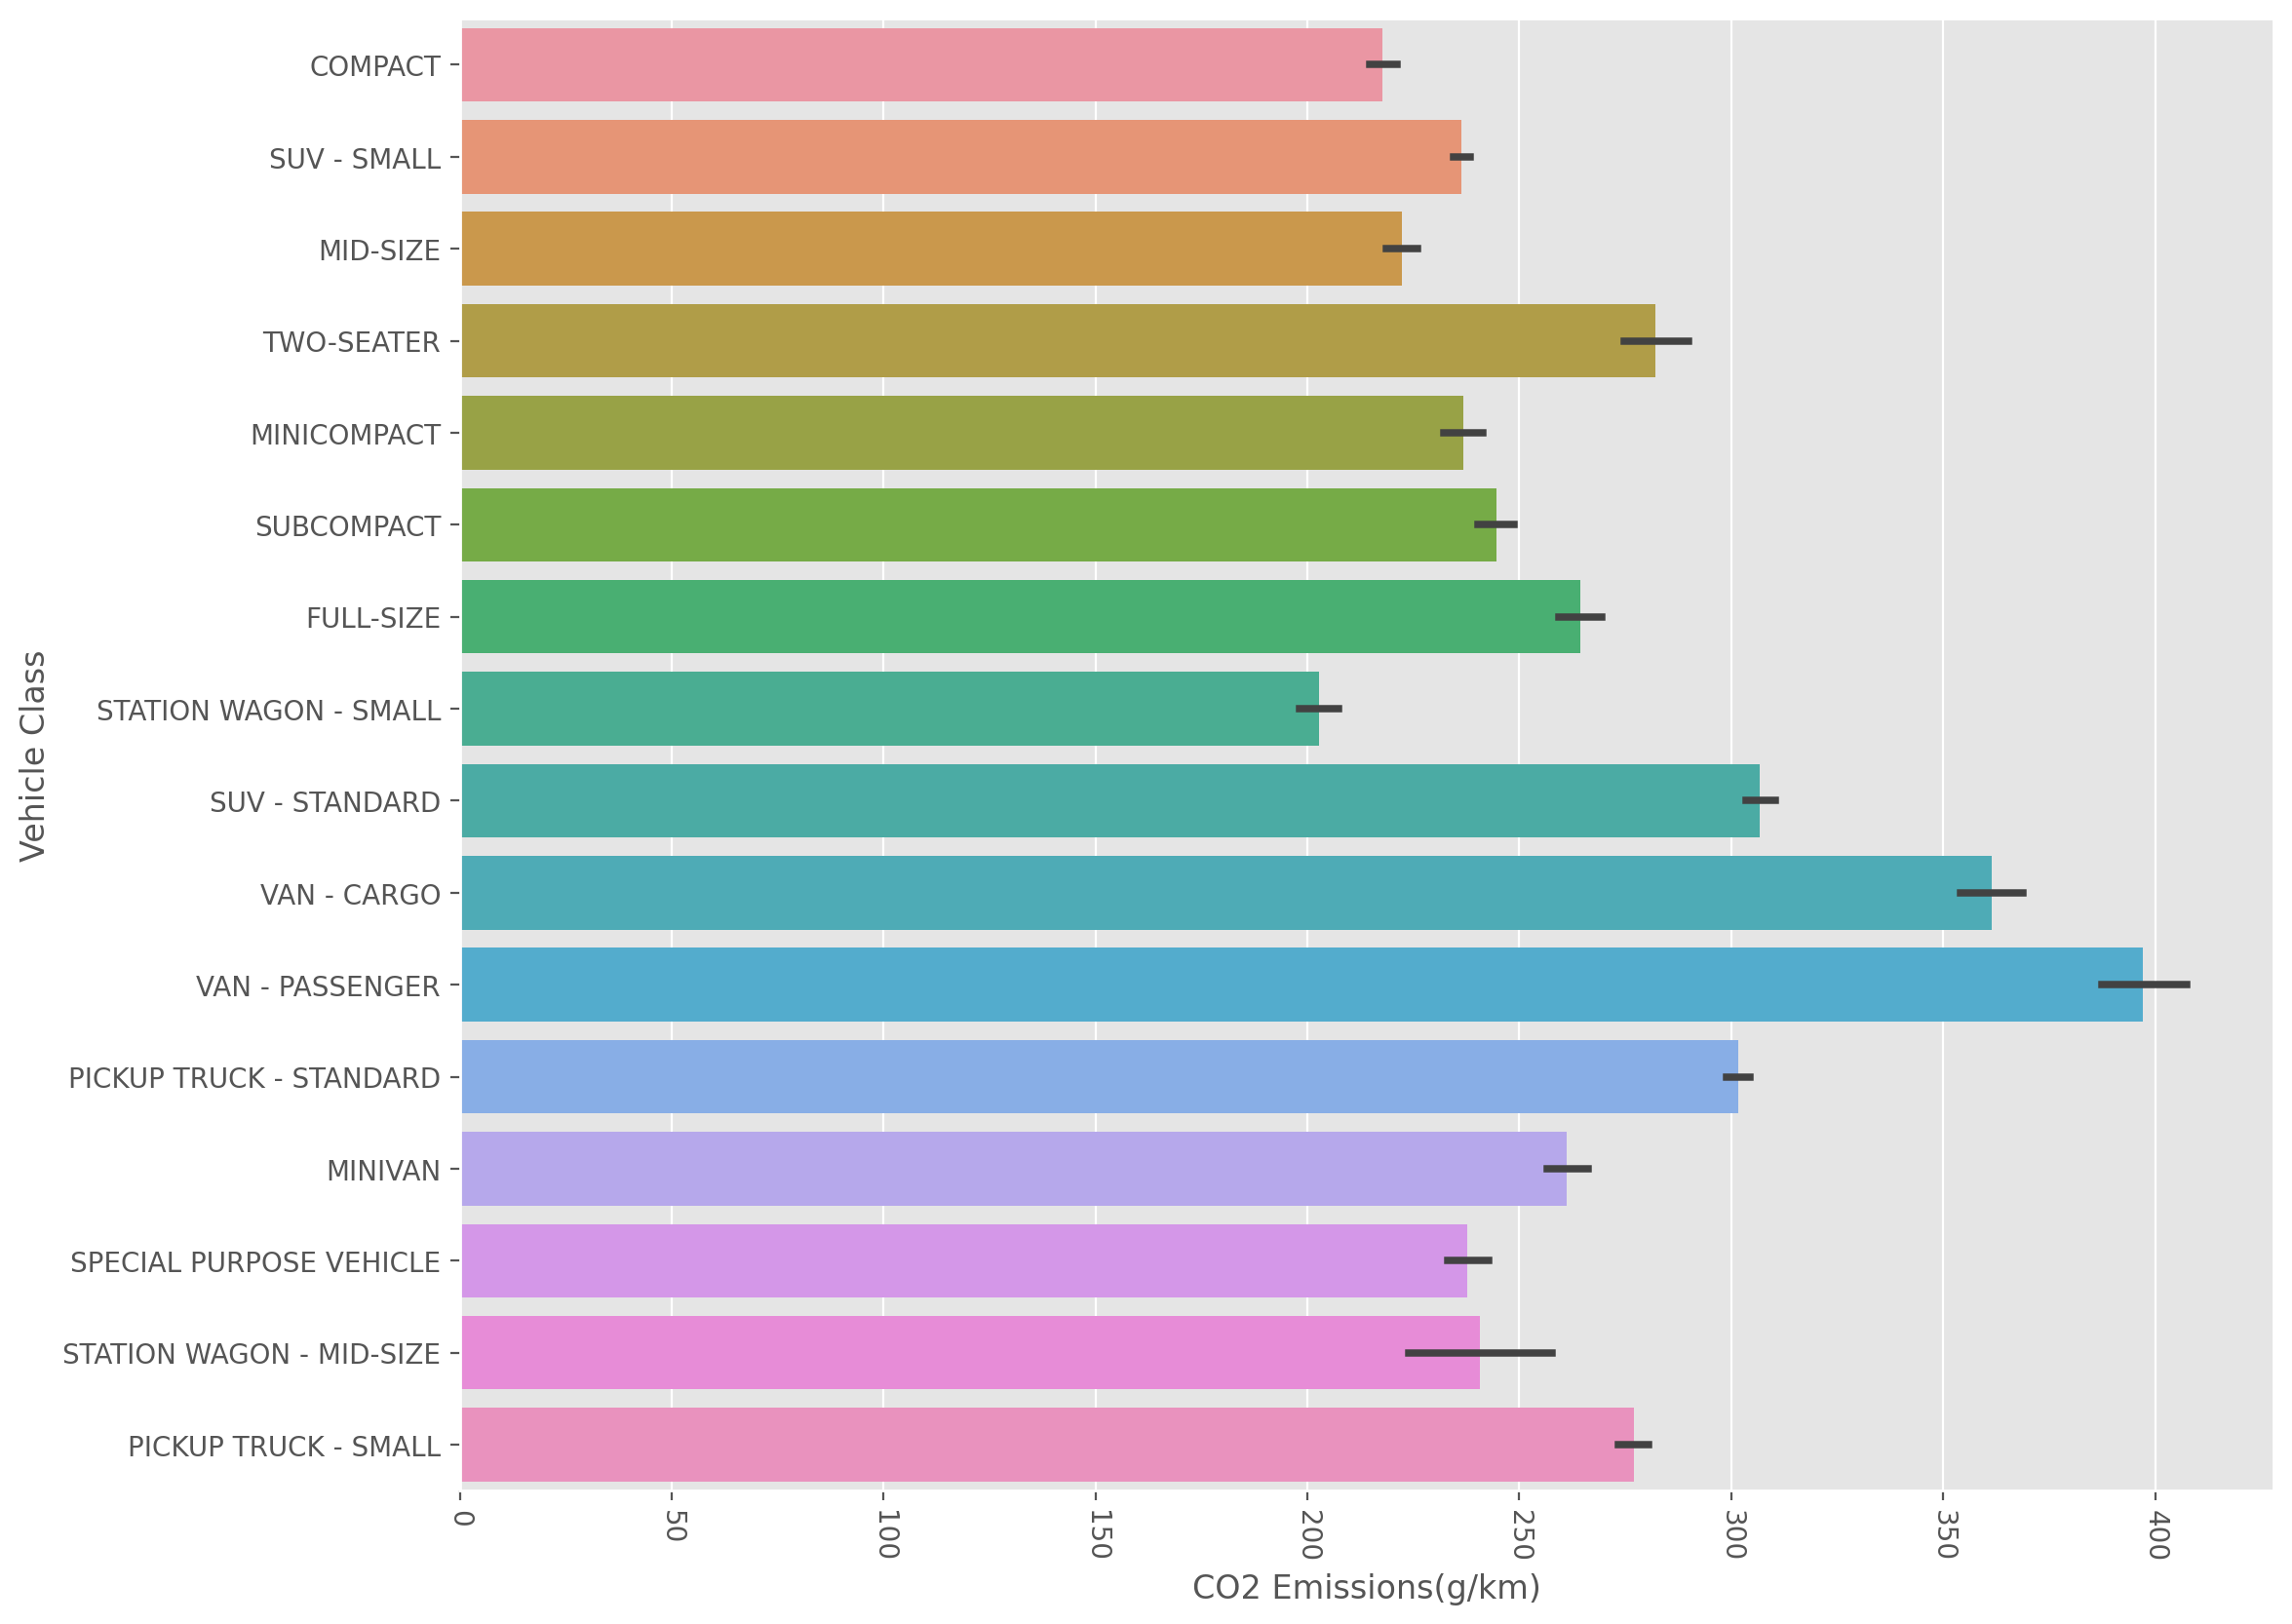

In [ ]:
plt.figure(figsize = (12,10), dpi = 200 )
plt.xticks(rotation = 270)
sns.barplot( 'CO2 Emissions(g/km)','Vehicle Class', data = data)

In [ ]:
data.groupby('Vehicle Class')['CO2 Emissions(g/km)'].mean()

Vehicle Class
COMPACT                     217.641196
FULL-SIZE                   264.407480
MID-SIZE                    222.292981
MINICOMPACT                 236.675182
MINIVAN                     261.114754
PICKUP TRUCK - SMALL        277.022556
PICKUP TRUCK - STANDARD     301.610526
SPECIAL PURPOSE VEHICLE     237.815385
STATION WAGON - MID-SIZE    240.755556
STATION WAGON - SMALL       202.686916
SUBCOMPACT                  244.568480
SUV - SMALL                 236.413519
SUV - STANDARD              306.730832
TWO-SEATER                  282.086614
VAN - CARGO                 361.500000
VAN - PASSENGER             397.212121
Name: CO2 Emissions(g/km), dtype: float64

In [ ]:
data.groupby('Vehicle Class')['CO2 Emissions(g/km)'].mean().sort_values(ascending=False)

Vehicle Class
VAN - PASSENGER             397.212121
VAN - CARGO                 361.500000
SUV - STANDARD              306.730832
PICKUP TRUCK - STANDARD     301.610526
TWO-SEATER                  282.086614
PICKUP TRUCK - SMALL        277.022556
FULL-SIZE                   264.407480
MINIVAN                     261.114754
SUBCOMPACT                  244.568480
STATION WAGON - MID-SIZE    240.755556
SPECIAL PURPOSE VEHICLE     237.815385
MINICOMPACT                 236.675182
SUV - SMALL                 236.413519
MID-SIZE                    222.292981
COMPACT                     217.641196
STATION WAGON - SMALL       202.686916
Name: CO2 Emissions(g/km), dtype: float64

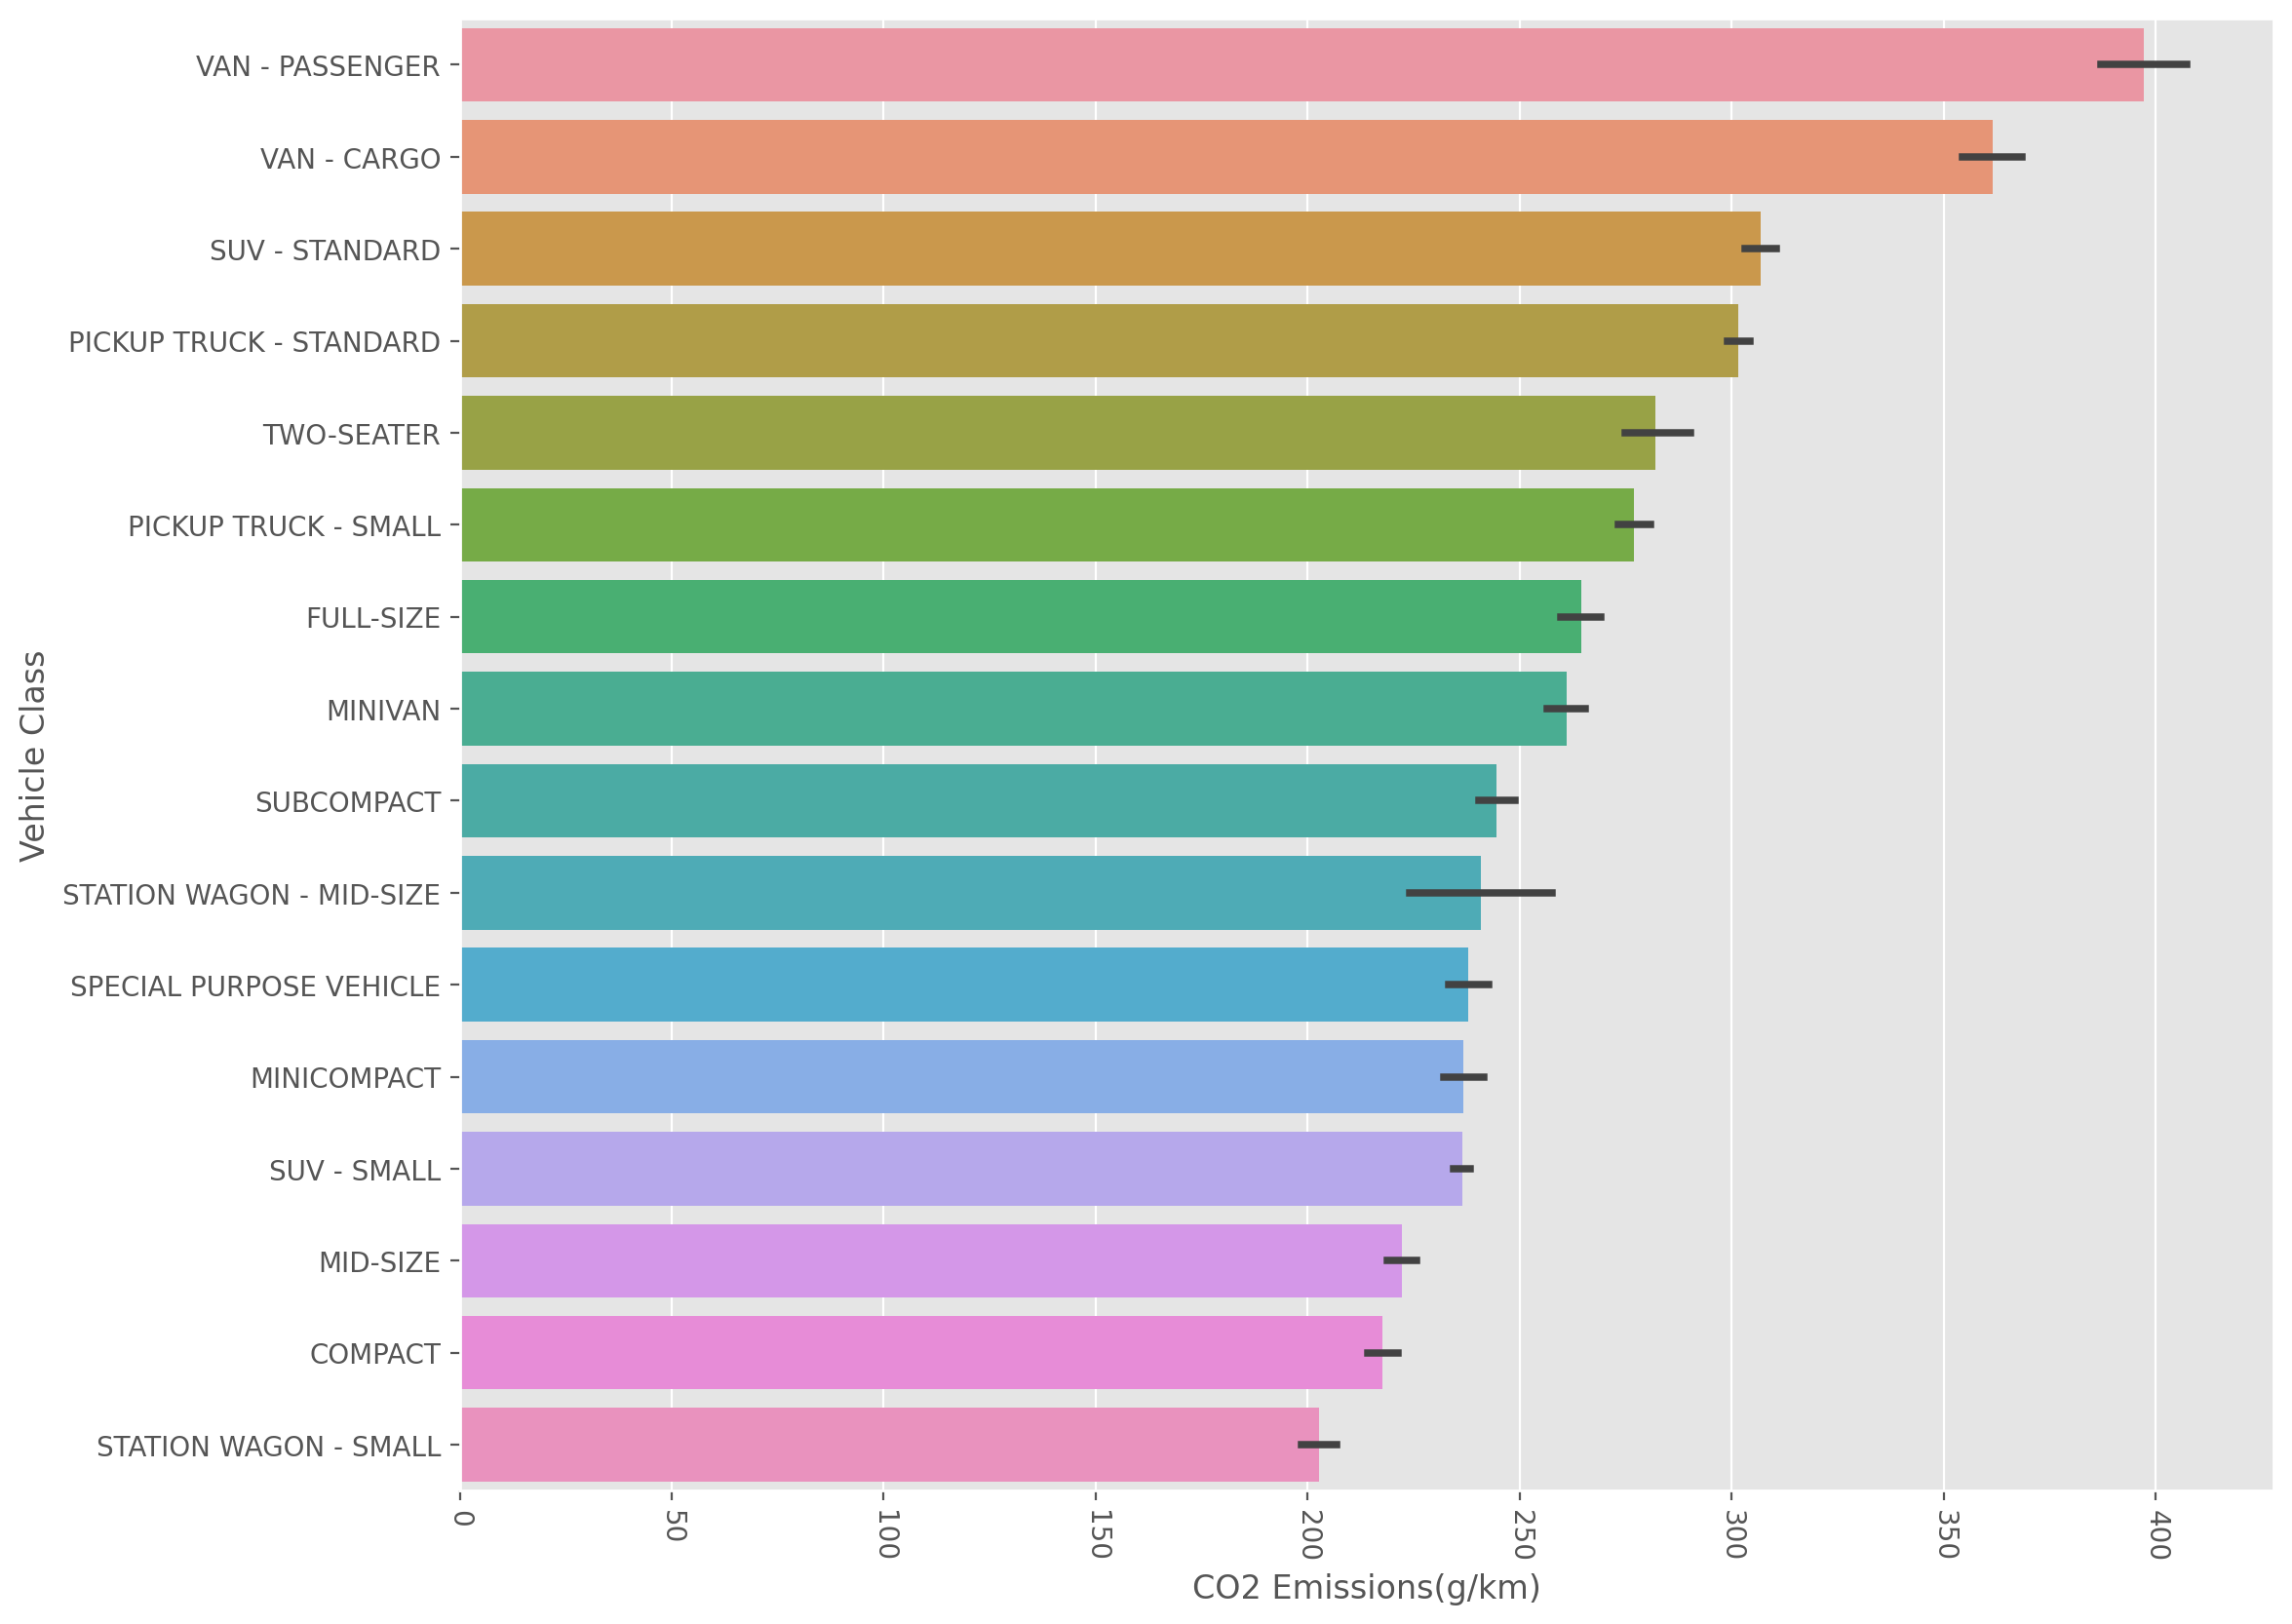

In [ ]:
order = data.groupby('Vehicle Class')['CO2 Emissions(g/km)'].mean().sort_values(ascending=False).index
plt.figure(figsize = (12,10), dpi = 200 )
plt.xticks(rotation = 270)
sns.barplot( 'CO2 Emissions(g/km)','Vehicle Class', data = data, order=order)

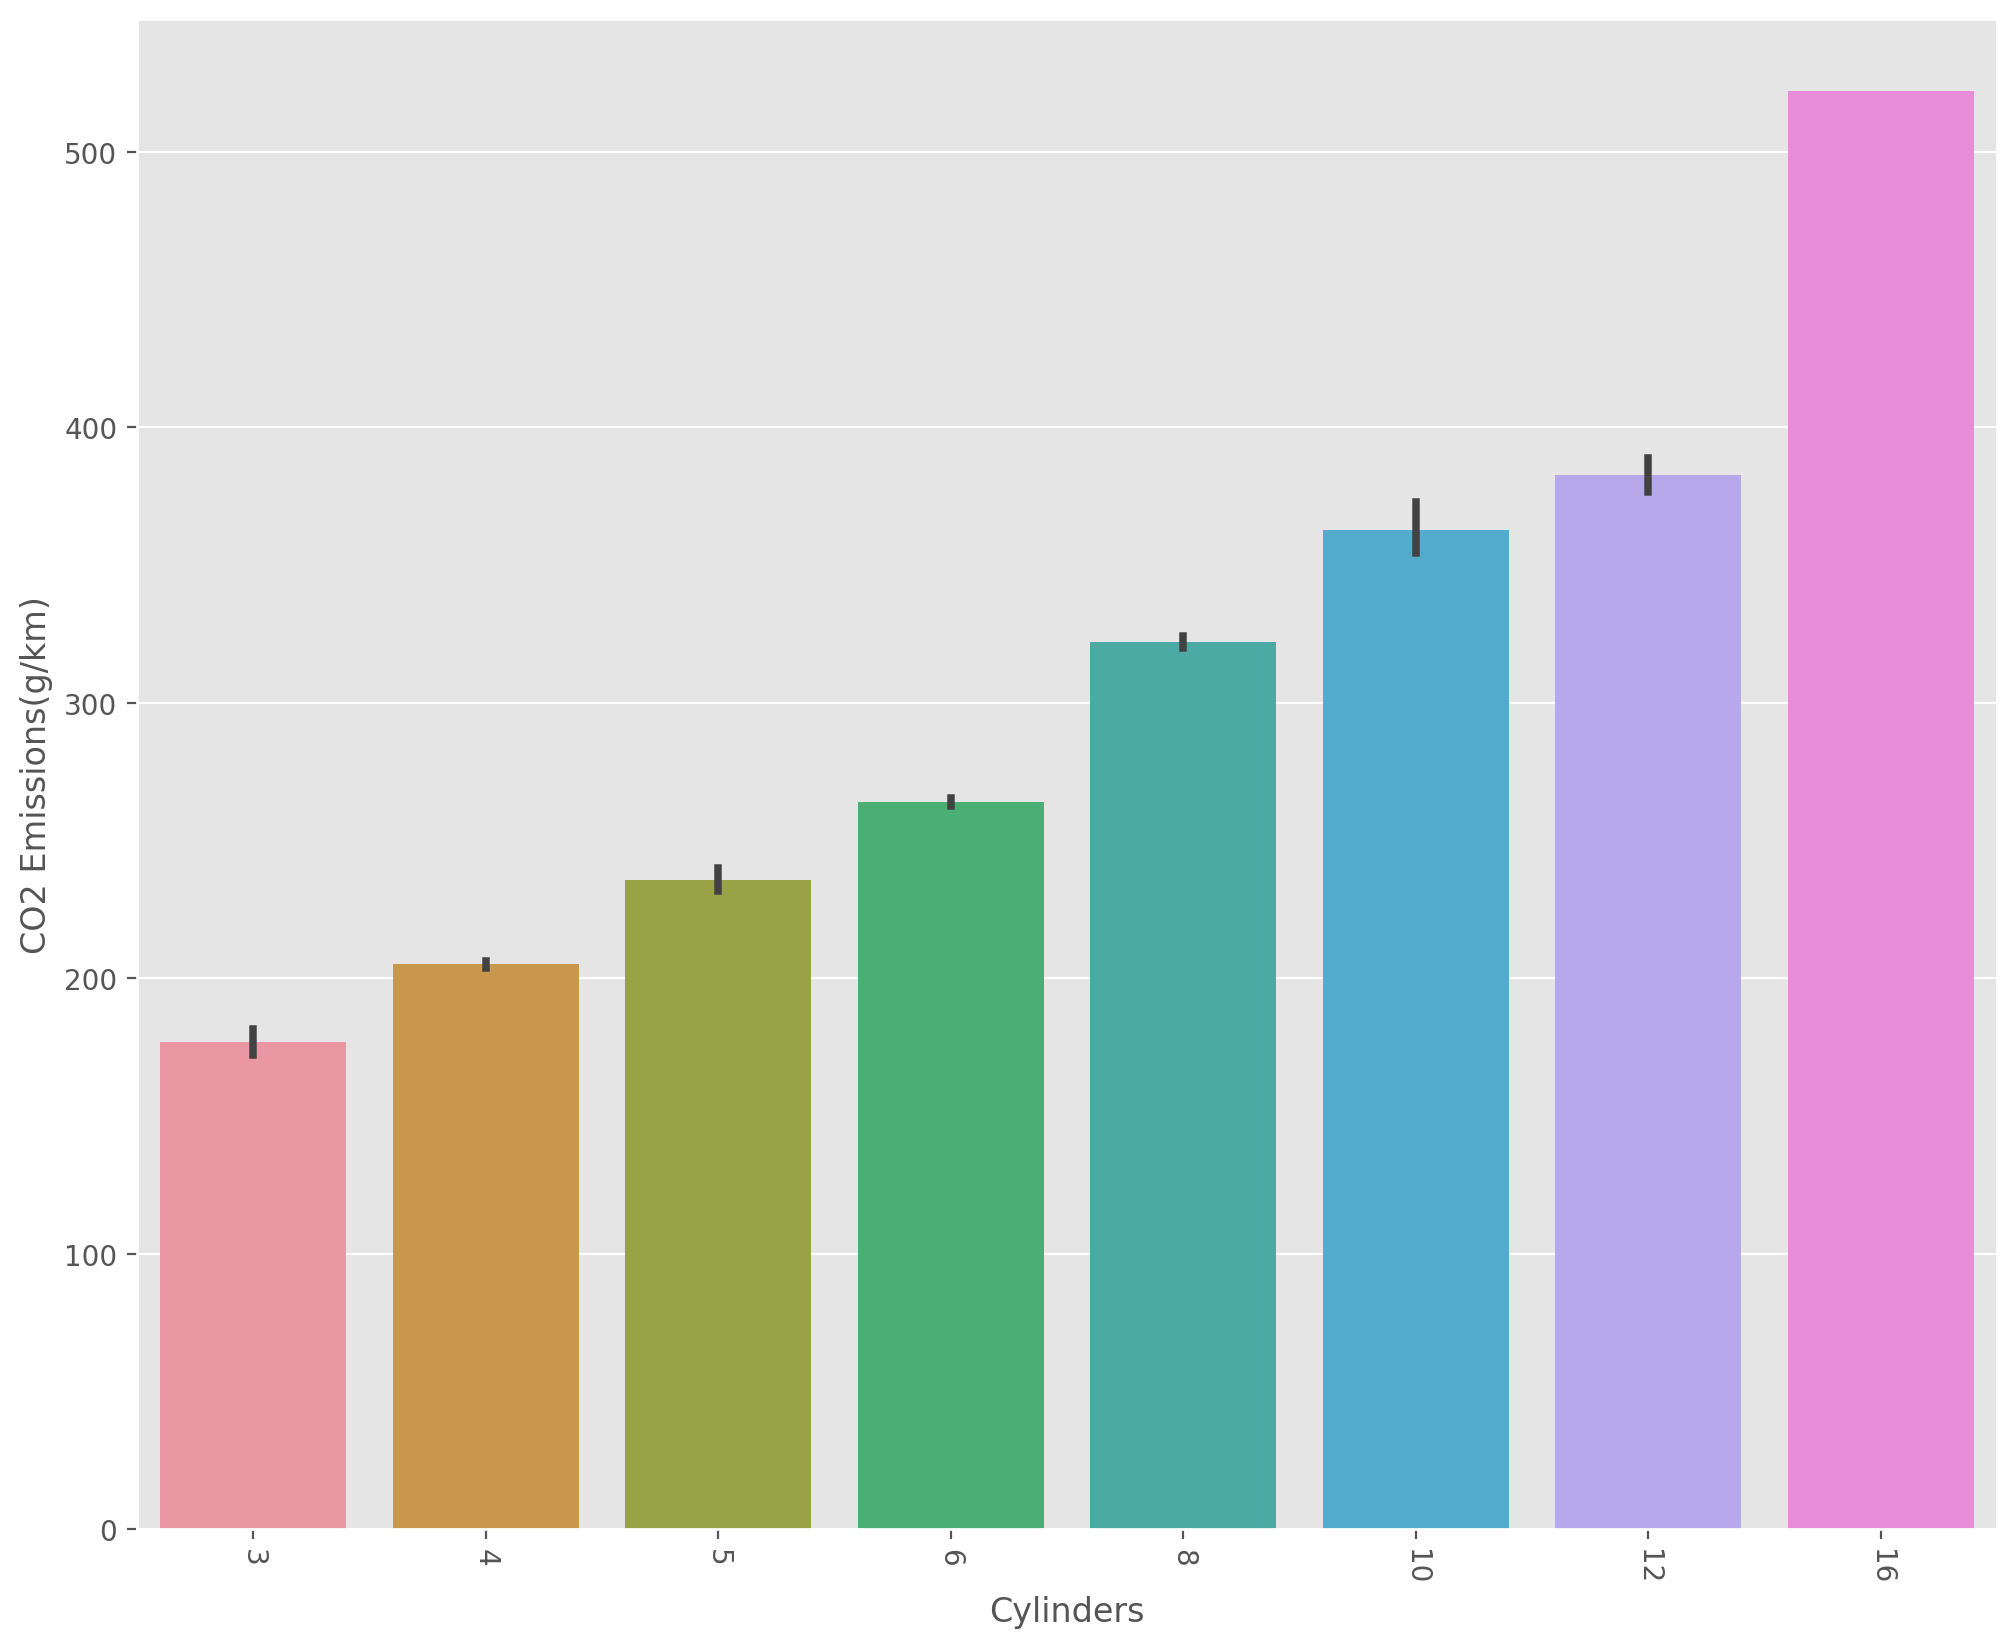

In [ ]:
plt.figure(figsize = (12,10), dpi = 200 )
plt.xticks(rotation = 270)
sns.barplot( 'Cylinders','CO2 Emissions(g/km)', data = data)

In [ ]:
plt.figure(figsize = (12,10), dpi = 200 )
plt.xticks(rotation = 270)
sns.barplot( 'Cylinders','CO2 Emissions(g/km)', data = data)

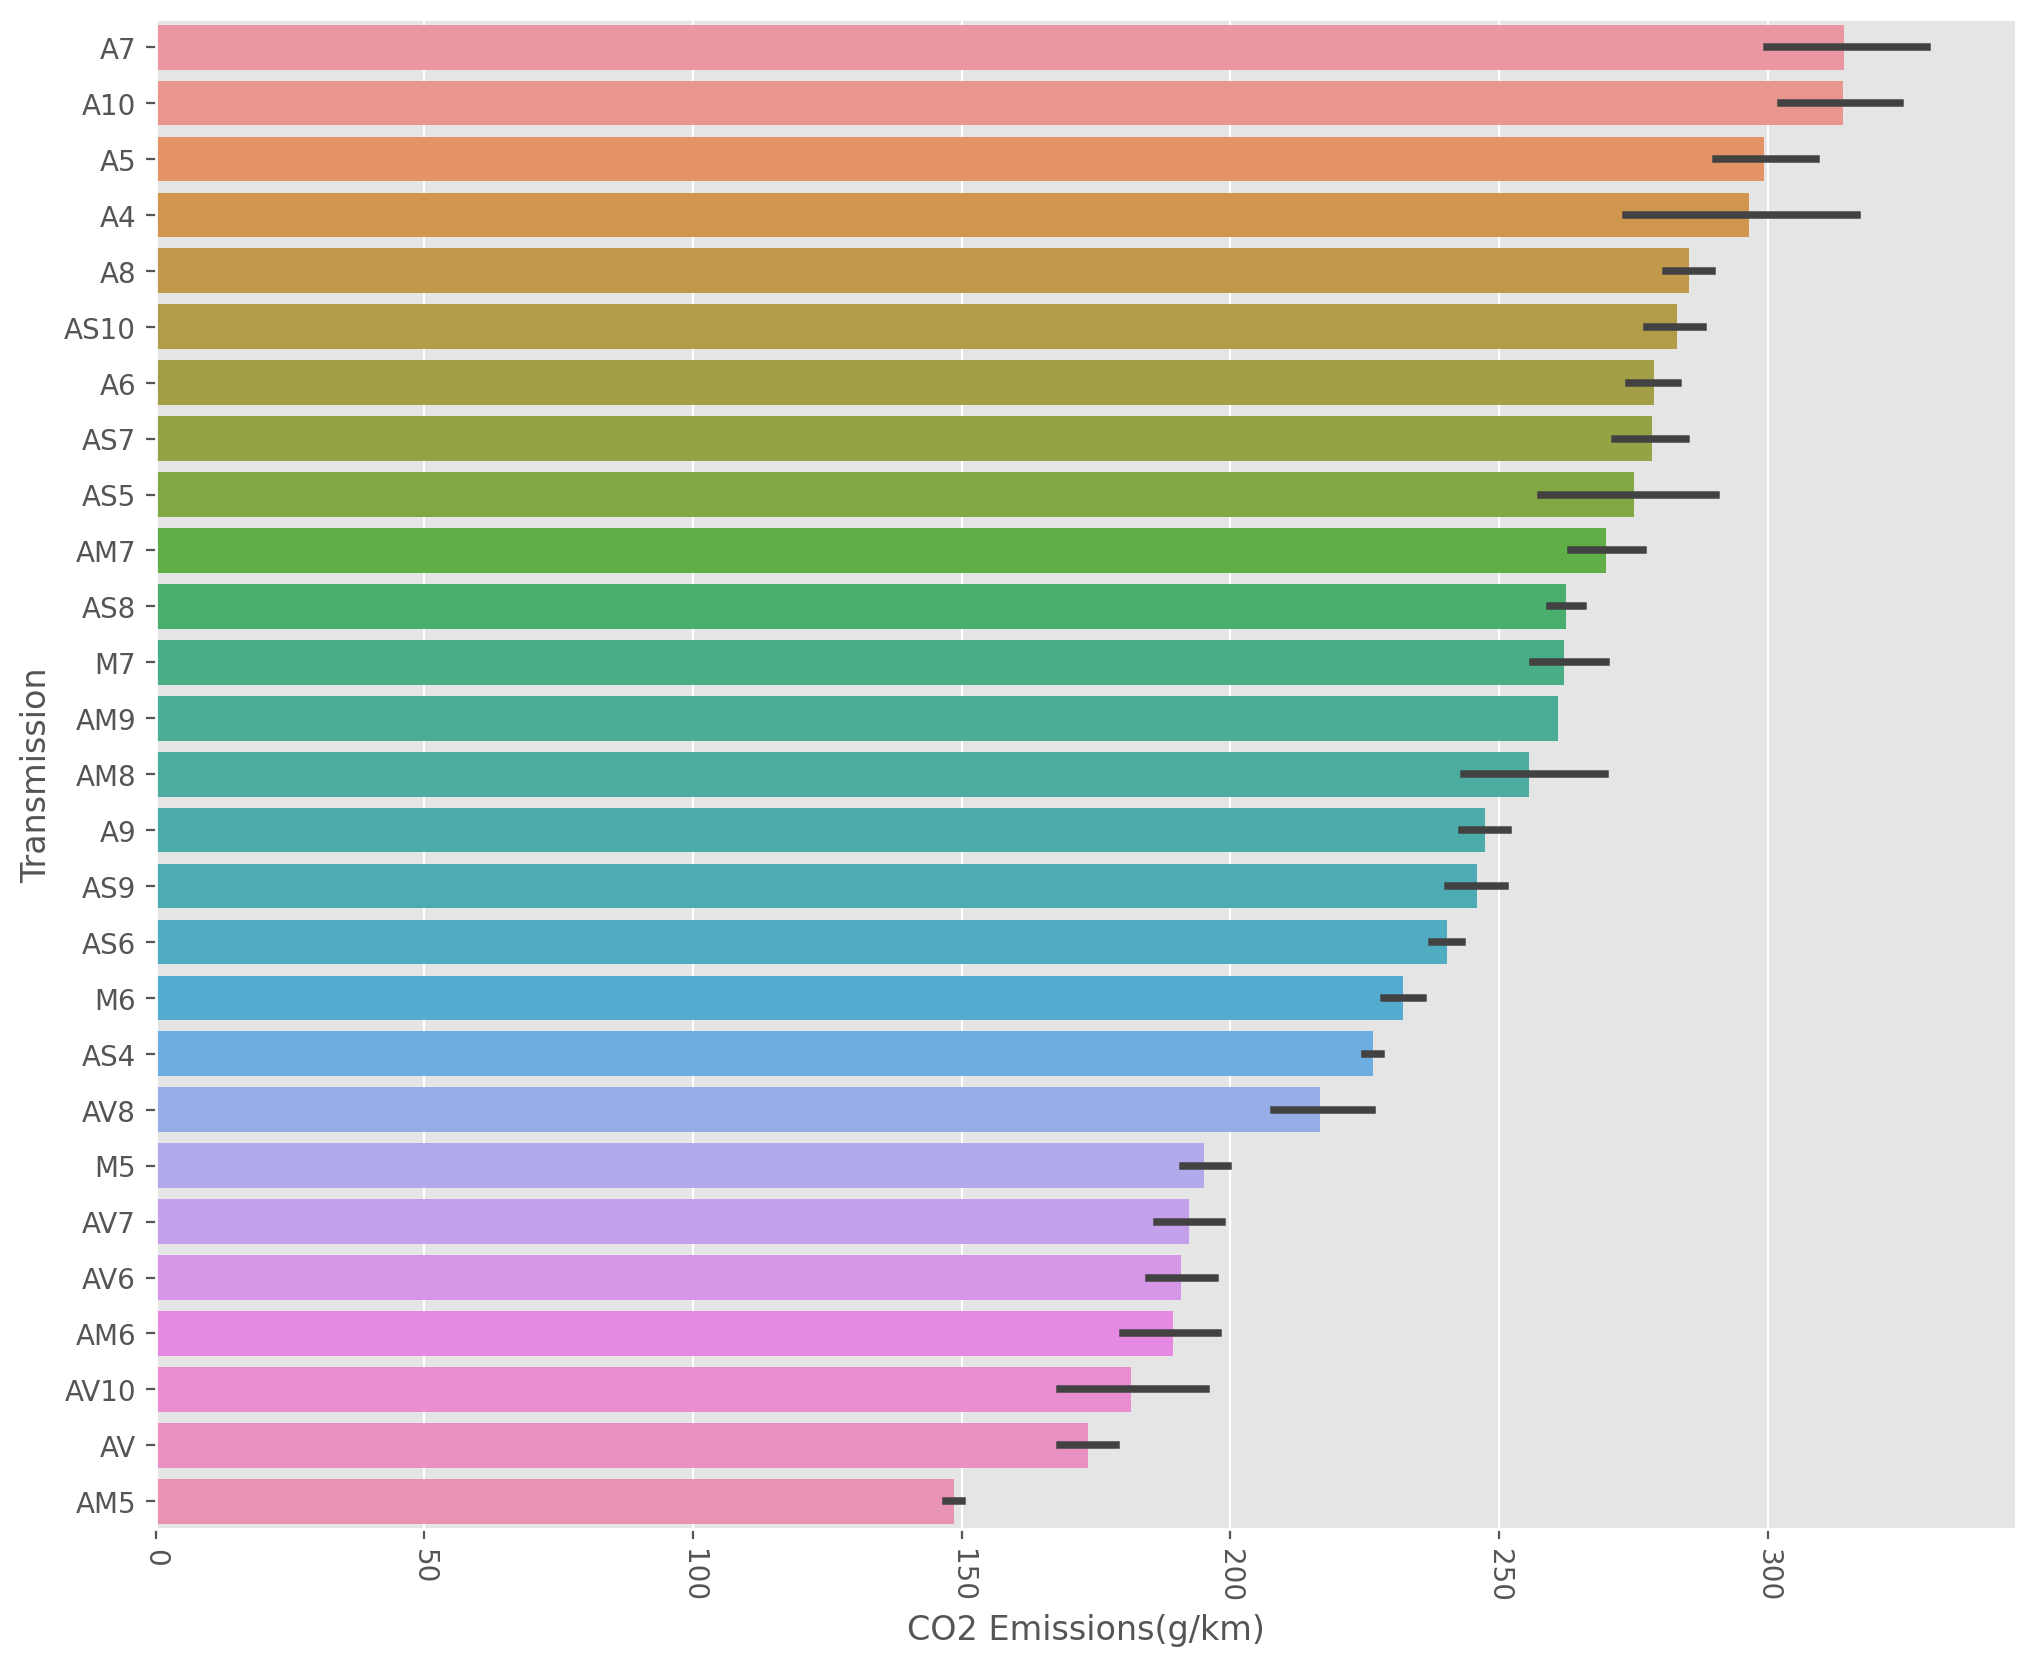

In [ ]:
order = data.groupby('Transmission')['CO2 Emissions(g/km)'].mean().sort_values(ascending=False).index
plt.figure(figsize = (12,10), dpi = 200 )
plt.xticks(rotation = 270)
sns.barplot( 'CO2 Emissions(g/km)','Transmission', data = data, order=order)

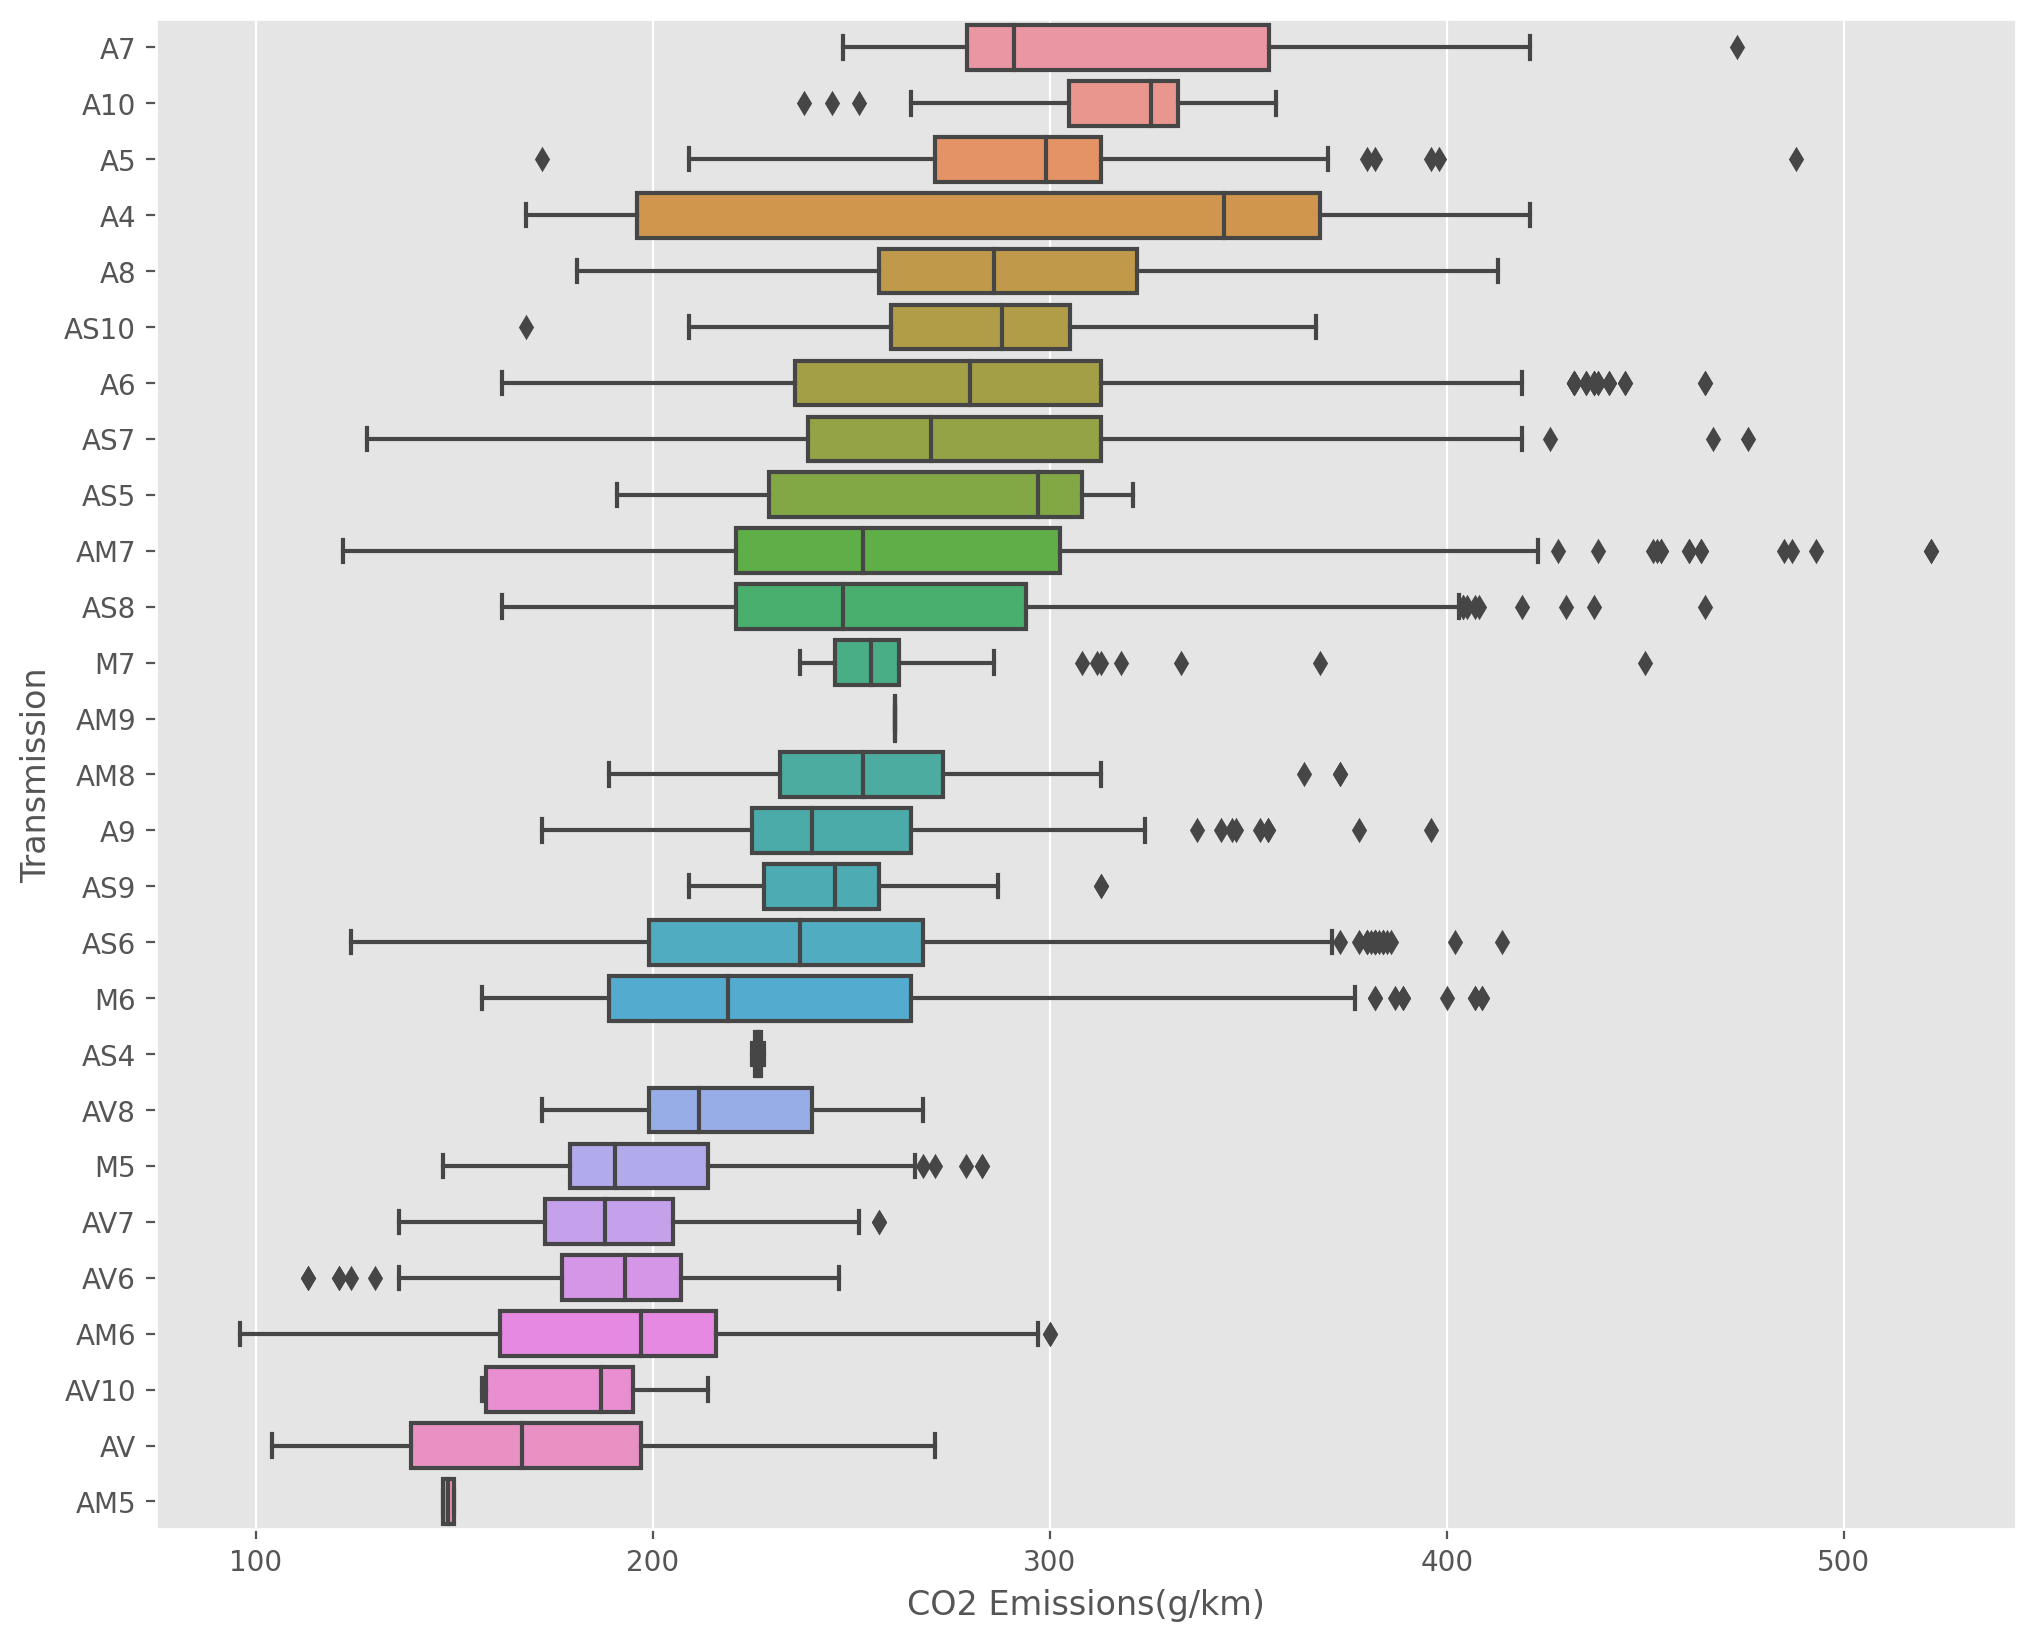

In [ ]:
order = data.groupby('Transmission')['CO2 Emissions(g/km)'].mean().sort_values(ascending=False).index
plt.figure(figsize = (12,10), dpi = 200 )
sns.boxplot( 'CO2 Emissions(g/km)','Transmission', data = data, order=order)

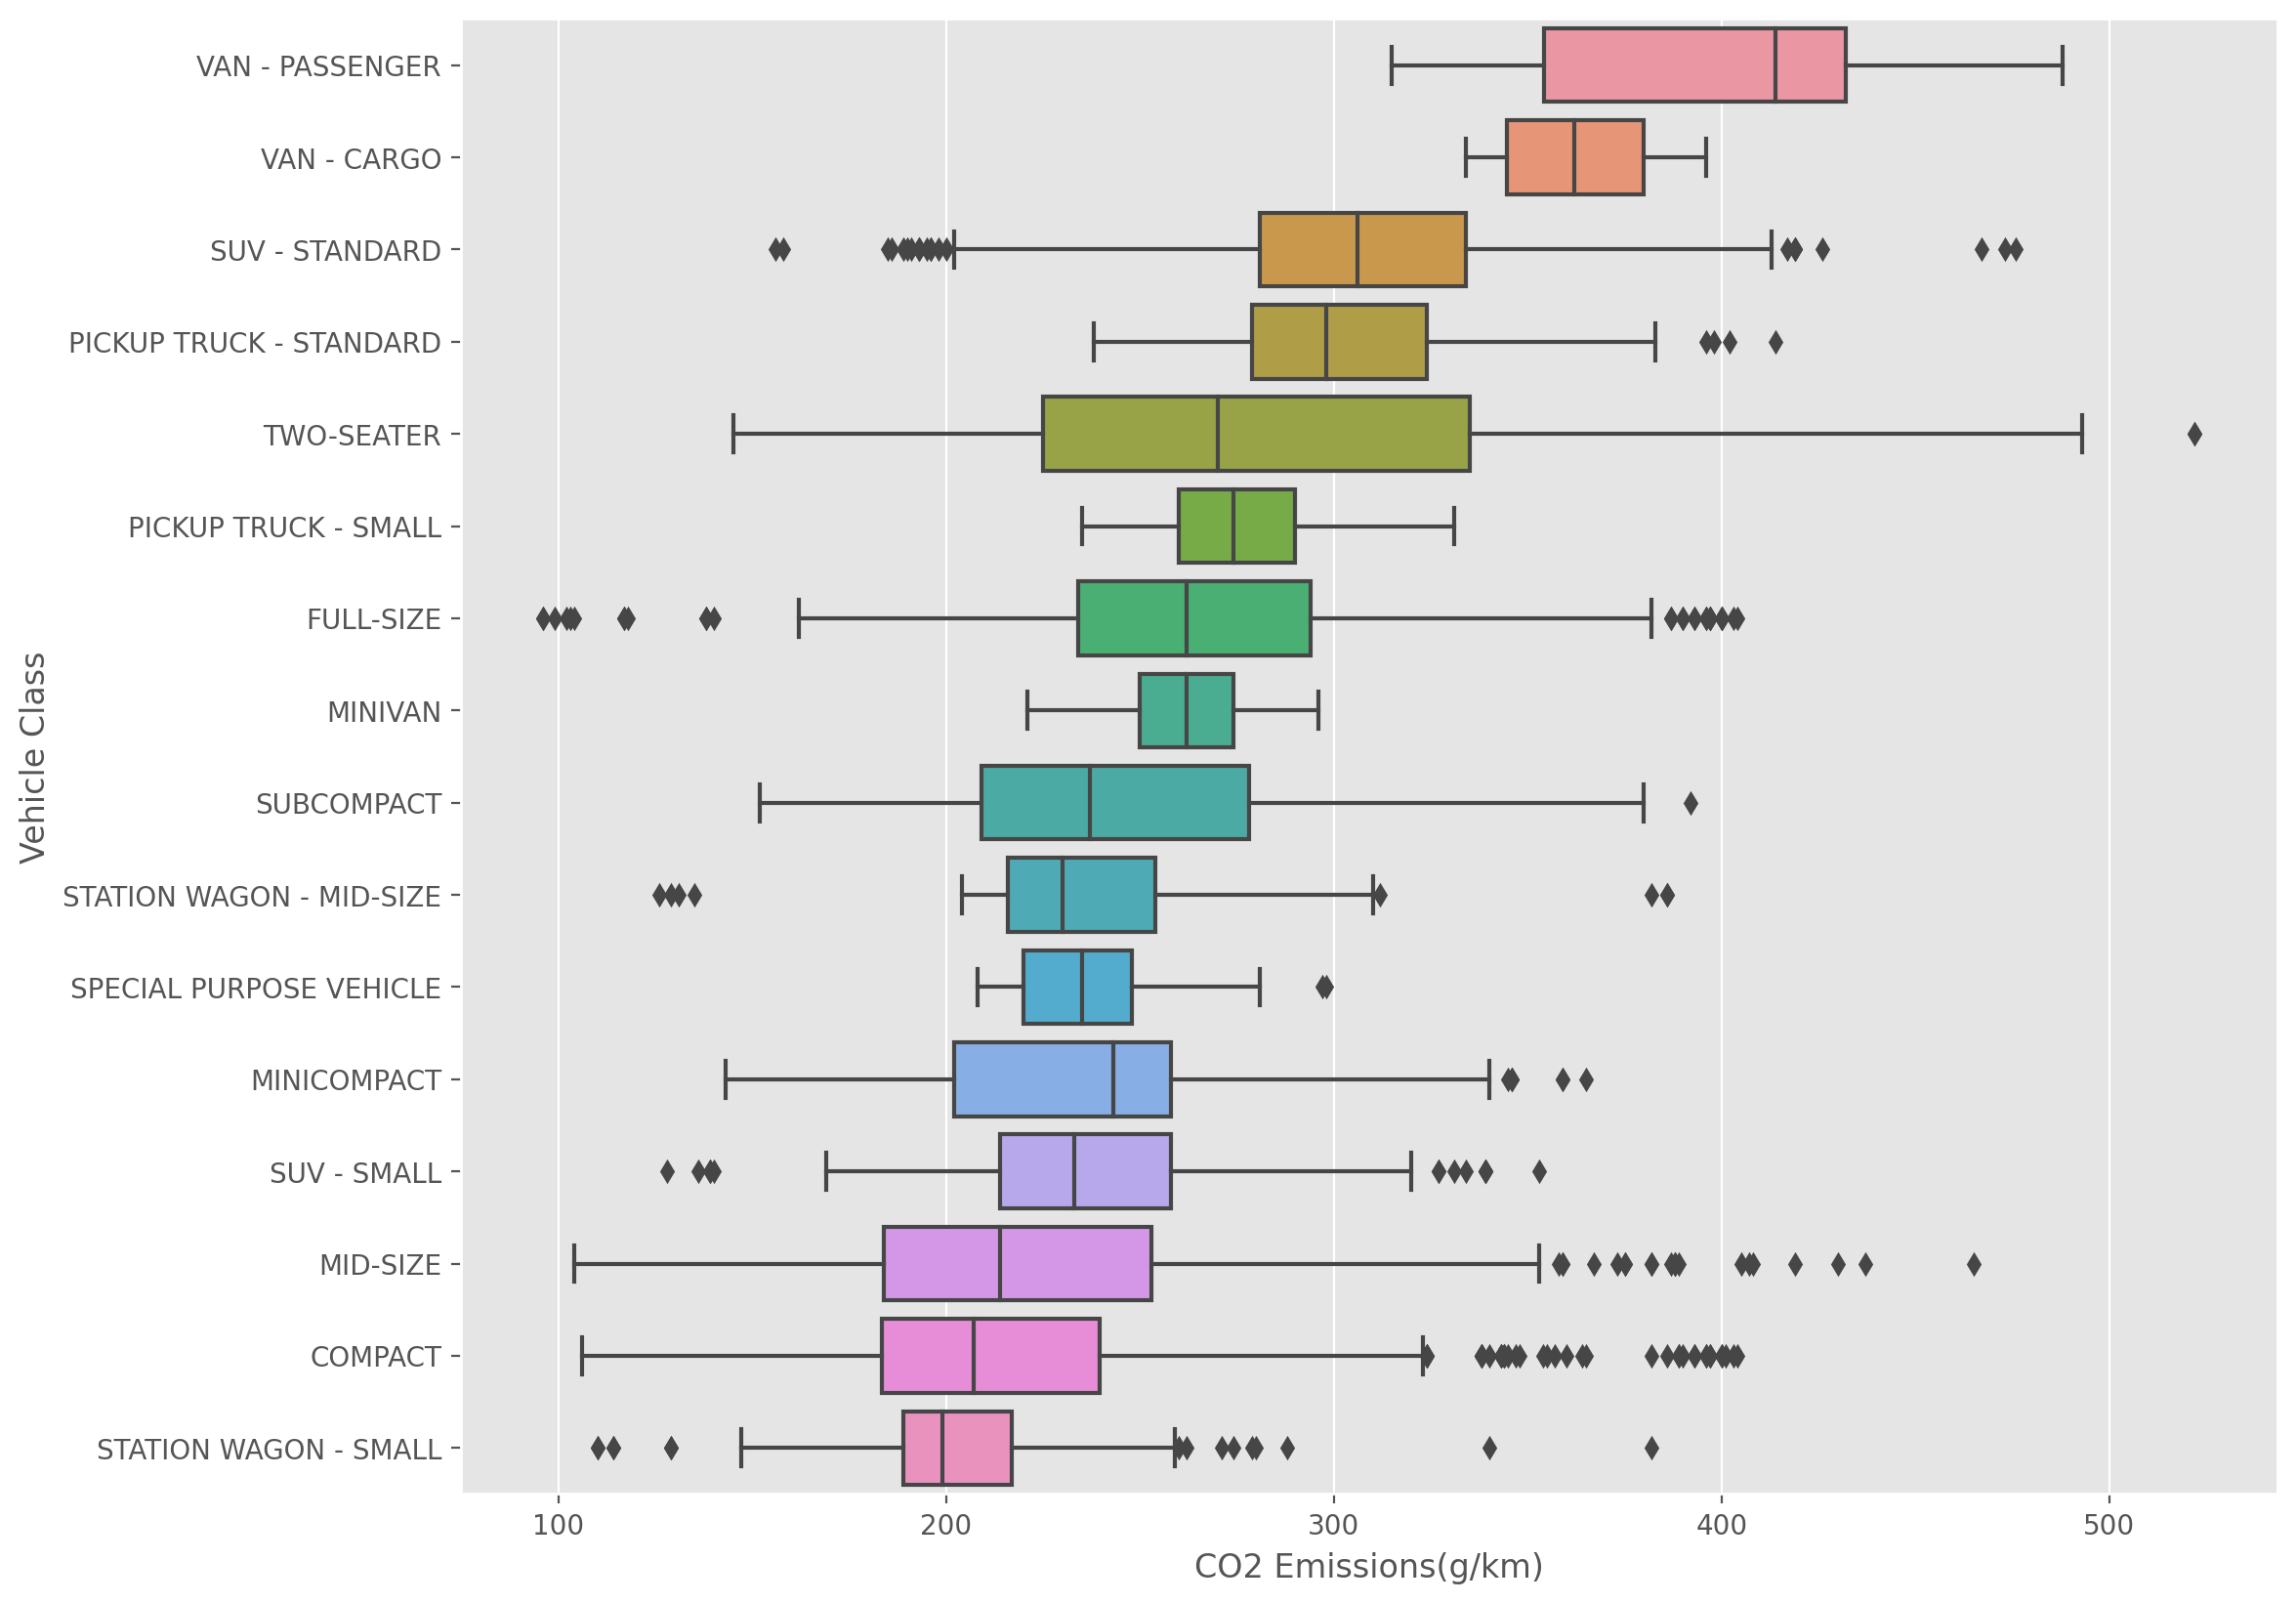

In [ ]:
order = data.groupby('Vehicle Class')['CO2 Emissions(g/km)'].mean().sort_values(ascending=False).index
plt.figure(figsize = (12,10), dpi = 200 )
sns.boxplot( 'CO2 Emissions(g/km)','Vehicle Class', data = data, order=order)

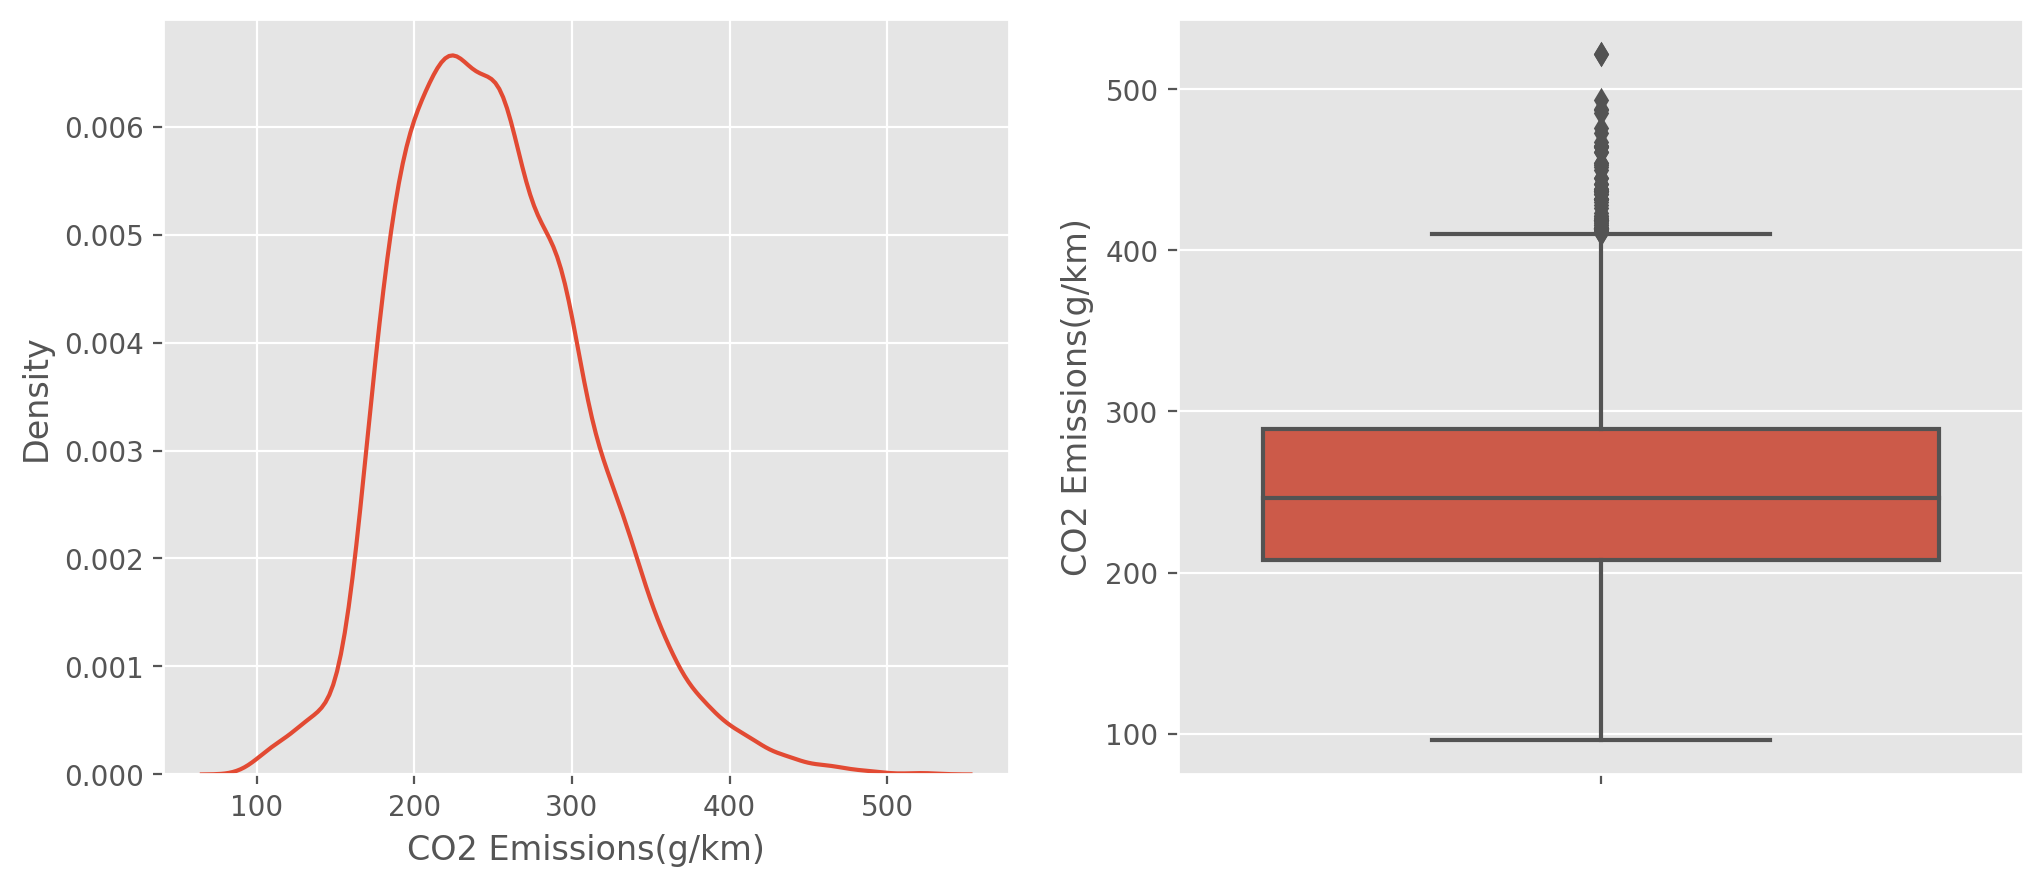

In [ ]:
plt.figure(figsize = (12,5), dpi = 200 )

plt.subplot(1,2,1)
sns.distplot(data['CO2 Emissions(g/km)'], hist=False)
                
plt.subplot(1,2,2)
sns.boxplot( y= data['CO2 Emissions(g/km)'])

In [ ]:
# Correlation Analysis

data.corr()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.928843,0.834228,0.766817,0.820146,-0.762955,0.854802
Cylinders,0.928843,1.000000,0.801277,0.717647,0.781099,-0.723731,0.834687
Fuel Consumption City (L/100 km),0.834228,0.801277,1.000000,0.950811,0.994052,-0.927640,0.918756
Fuel Consumption Hwy (L/100 km),0.766817,0.717647,0.950811,1.000000,0.978607,-0.891892,0.883424
Fuel Consumption Comb (L/100 km),0.820146,0.781099,0.994052,0.978607,1.000000,-0.925801,0.916840
Fuel Consumption Comb (mpg),-0.762955,-0.723731,-0.927640,-0.891892,-0.925801,1.000000,-0.906783
CO2 Emissions(g/km),0.854802,0.834687,0.918756,0.883424,0.916840,-0.906783,1.000000


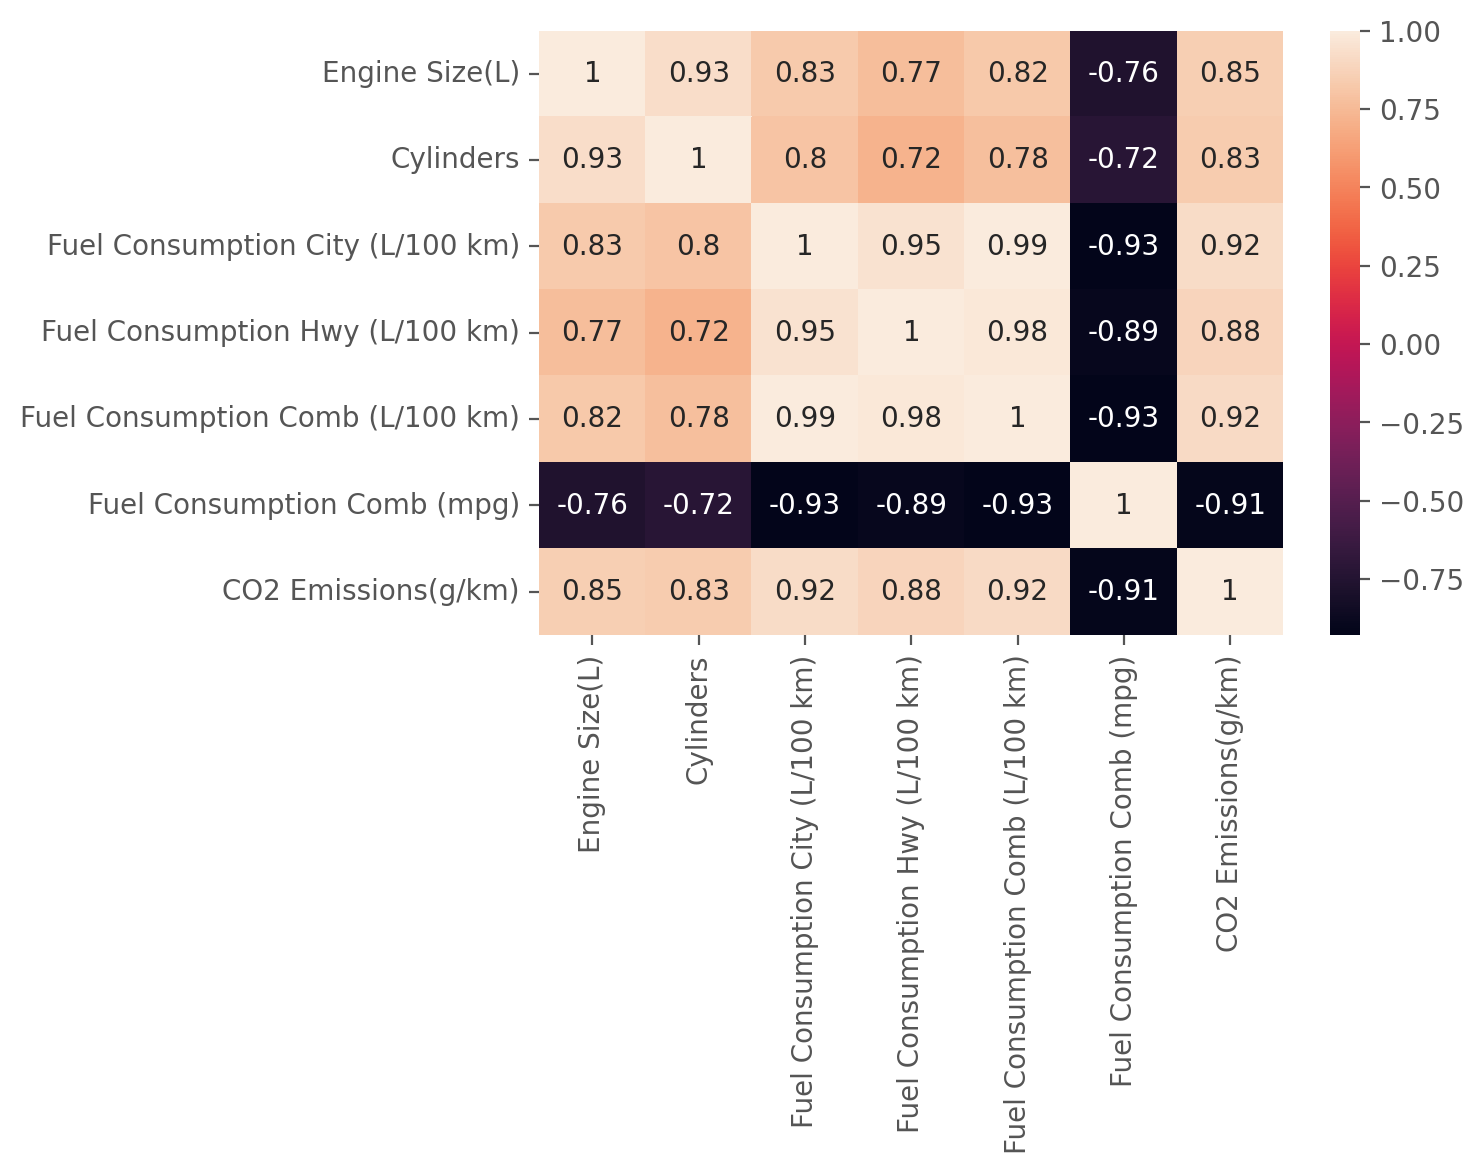

In [ ]:
plt.figure(dpi = 200)
sns.heatmap(data.corr(), annot=True)

In [ ]:
cols = [
    'Vehicle Class',
    'Transmission',
    'Fuel Type',
    'Cylinders',
    'Engine Size(L)',
    'Fuel Consumption Comb (L/100 km)'
]
cols

['Vehicle Class',
 'Transmission',
 'Fuel Type',
 'Cylinders',
 'Engine Size(L)',
 'Fuel Consumption Comb (L/100 km)']

In [ ]:
X.head()

,Vehicle Class,Transmission,Fuel Type,Cylinders,Engine Size(L),Fuel Consumption Comb (L/100 km)
0,COMPACT,AS5,Z,4,2.0,8.5
1,COMPACT,M6,Z,4,2.4,9.6
2,COMPACT,AV7,Z,4,1.5,5.9
3,SUV - SMALL,AS6,Z,6,3.5,11.1
4,SUV - SMALL,AS6,Z,6,3.5,10.6


In [ ]:
X = data[cols]
Y = data[['CO2 Emissions(g/km)']]

print('independent features shape: ', X.shape) 

In [ ]:
print('dependent features shape: ', Y.shape)

dependent features shape:  (6282, 1)


## Encoding

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()



In [ ]:
cols_enc = ['Vehicle Class','Transmission','Fuel Type']

In [ ]:
X[cols_enc] = encoder.fit_transform(X[cols_enc])

In [ ]:
X.head()

,Vehicle Class,Transmission,Fuel Type,Cylinders,Engine Size(L),Fuel Consumption Comb (L/100 km)
0,0.0,14.0,4.0,4,2.0,8.5
1,0.0,25.0,4.0,4,2.4,9.6
2,0.0,22.0,4.0,4,1.5,5.9
3,11.0,15.0,4.0,6,3.5,11.1
4,11.0,15.0,4.0,6,3.5,10.6


## Spliting

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()


In [ ]:
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
regressor.intercept_

array([20.15610885])

In [ ]:
regressor.coef_

array([[ 0.84474748, -0.08737671, 10.21039645,  4.42152012,  6.65349129,
        13.38050988]])

In [ ]:
regressor.predict(x_test)

array([[230.31788238],
       [249.20895787],
       [271.61901277],
       ...,
       [251.40715906],
       [278.13775908],
       [253.58258957]])

In [ ]:
print('Testing Score: ', regressor.score(x_test,y_test))

Testing Score:  0.9161293328269039


In [ ]:
print('Training Score: ', regressor.score(x_train,y_train))

Training Score:  0.8969310051063465
